In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# List of players in the squad along with their roles
players_and_roles = {
    "Rohit Sharma": "batter",
    "Hardik Pandya": "batter bowler",
    "Shubman Gill": "batter",
    "Virat Kohli": "batter",
    "Shreyas Iyer": "batter",
    "Ishan Kishan": "batter",
    "KL Rahul": "batter wicketkeeper",
    "Suryakumar Yadav": "batter",
    "Ravindra Jadeja": "batter bowler",
    "Axar Patel": "batter bowler",
    "Shardul Thakur": "pace bowler",
    "Jasprit Bumrah": "pace bowler",
    "Mohammed Shami": "pace bowler",
    "Mohammed Siraj": "pace bowler",
    "Kuldeep Yadav": "spin bowler"
}

# List of opponents
opponents = ["South Africa", "Australia", "New Zealand", "Pakistan", "Afghanistan", "England", "Bangladesh", "Sri Lanka", "Netherlands"]



EARLIEST_YEAR = 2017

In [3]:
# Function to read player data from JSON files
def read_player_data(player_name):
    file_path = f"../data/players/{player_name}.json"
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

## Batting Statistics Functions

In [4]:
# Function to extract relevant batting statistics

def batting_record_parser(record, id_extractor):
    res = {
        "id": id_extractor(record['tt']),
        "matches": record["mt"] or 0,
        "runs": record["rn"]  or 0,
        "fours": record["fo"]  or 0,
        "sixes": record["si"]  or 0,
        "fifties": record["ft"]  or 0,
        "hundreds": record["hn"]  or 0,
        "batting_average": record["bta"]  or 0,
        "batting_strike_rate": record["btsr"]  or 0,
        "batting_strike_rate": record["btsr"]  or 0,
    }
    not_out_percentage = (int(record["no"] or 0)/int(res["matches"]))*100
    if not_out_percentage:
        res["not_out_percentage"] = not_out_percentage
    return res


def extract_batting_statistics(data):
    batting_stats = data.get('BATTING', {}).get('summary', {}).get('groups', [])
    
    # by opposition
    try:
        opposition_stats = list(filter(lambda grp: grp.get('type') == "OPPOSITION_TEAM", batting_stats))[0]['stats']
        opposition_stats = [batting_record_parser(ot, lambda nm: nm.split()[1]) for ot in opposition_stats]
        opposition_stats = list(filter(lambda stat: stat['id'] in opponents, opposition_stats))
    except:
        opposition_stats = []

    # by year
    try:
        yearwise_stats = list(filter(lambda grp: grp.get('type') == "YEAR", batting_stats))[0]['stats']
        yearwise_stats = [batting_record_parser(ot, lambda nm: int(nm.split()[1])) for ot in yearwise_stats]
        yearwise_stats = list(filter(lambda stat: stat['id'] >= EARLIEST_YEAR, yearwise_stats))
    except:
        yearwise_stats = []

    # by position
    try:
        position_stats = list(filter(lambda grp: grp.get('type') == "BATTING_POSITION", batting_stats))[0]['stats']
        position_stats = [batting_record_parser(ot, lambda nm: (nm.split()[0])) for ot in position_stats]
    except:
        position_stats = []


    return opposition_stats, yearwise_stats, position_stats

In [5]:
# Function to create EDA plots for batting statistics
def create_batting_eda_plots(player_name, stats_type, stats_df):
    plt.figure(figsize=(14, 12))
    
    # Runs scored by the player against each category
    plt.subplot(3, 2, 1)
    sns.barplot(x=stats_df['id'], y=stats_df['runs'])
    plt.title(f'Runs Scored by {player_name} - {stats_type}')
    plt.xlabel(stats_type)
    plt.ylabel('Runs')

    # Fifties scored by the player against each category
    plt.subplot(3, 2, 2)
    sns.barplot(x=stats_df['id'], y=stats_df['fifties'])
    plt.title(f'Fifties Scored by {player_name} - {stats_type}')
    plt.xlabel(stats_type)
    plt.ylabel('Fifties')

    # Hundreds scored by the player against each category
    plt.subplot(3, 2, 3)
    sns.barplot(x=stats_df['id'], y=stats_df['hundreds'])
    plt.title(f'Hundreds Scored by {player_name} - {stats_type}')
    plt.xlabel(stats_type)
    plt.ylabel('Hundreds')

    # Batting Average of the player against each category
    plt.subplot(3, 2, 4)
    sns.barplot(x=stats_df['id'], y=stats_df['batting_average'])
    plt.title(f'Batting Average of {player_name} - {stats_type}')
    plt.xlabel(stats_type)
    plt.ylabel('Batting Average')

    # Batting Strike Rate of the player against each category
    plt.subplot(3, 2, 5)
    sns.barplot(x=stats_df['id'], y=stats_df['batting_strike_rate'])
    plt.title(f'Batting Strike Rate of {player_name} - {stats_type}')
    plt.xlabel(stats_type)
    plt.ylabel('Batting Strike Rate')

    plt.tight_layout()
    plt.show()


## Bowling Statistics Functions

In [6]:
# Function to extract relevant batting statistics

def bowling_record_parser(record, id_extractor):
    return {
        "id": id_extractor(record['tt']),
        "matches": record["mt"] or 0,
        "overs": record["ov"] or 0,
        "wickets": record["wk"] or 0,
        "maiden": record["md"] or 0,
        "bowling_strike_rate": record["bwsr"] or 0,
        "bowling_economy": record["bwe"] or 0,
    }


def extract_bowling_statistics(data):
    bowling_stats = data.get('BOWLING', {}).get('summary', {}).get('groups', [])
    
    # by opposition
    try:
        opposition_stats = list(filter(lambda grp: grp.get('type') == "OPPOSITION_TEAM", bowling_stats))[0]['stats']
        opposition_stats = [bowling_record_parser(ot, lambda nm: nm.split()[1]) for ot in opposition_stats]
        opposition_stats = list(filter(lambda stat: stat['id'] in opponents, opposition_stats))
    except:
        opposition_stats = []

    # by year
    try:
        yearwise_stats = list(filter(lambda grp: grp.get('type') == "YEAR", bowling_stats))[0]['stats']
        yearwise_stats = [bowling_record_parser(ot, lambda nm: int(nm.split()[1])) for ot in yearwise_stats]
        yearwise_stats = list(filter(lambda stat: stat['id'] >= EARLIEST_YEAR, yearwise_stats))
    except:
        yearwise_stats = []

    # by position
    try:
        position_stats = list(filter(lambda grp: grp.get('type') == "BOWLING_POSITION", bowling_stats))[0]['stats']
        position_stats = [bowling_record_parser(ot, lambda nm: (nm.split()[0])) for ot in position_stats]
    except:
        position_stats = []

    return opposition_stats, yearwise_stats, position_stats

In [7]:
# Function to create EDA plots for bowling statistics
def create_bowling_eda_plots(player_name, stats_type, stats_df):
    plt.figure(figsize=(14, 12))
    
    # Matches played by the player against each category
    plt.subplot(3, 2, 1)
    sns.barplot(x=stats_df['id'], y=stats_df['matches'])
    plt.title(f'Matches Played by {player_name} - {stats_type}')
    plt.xlabel(stats_type)
    plt.ylabel('Matches Played')

    # Overs bowled by the player against each category
    plt.subplot(3, 2, 2)
    sns.barplot(x=stats_df['id'], y=stats_df['overs'])
    plt.title(f'Overs Bowled by {player_name} - {stats_type}')
    plt.xlabel(stats_type)
    plt.ylabel('Overs Bowled')

    # Wickets taken by the player against each category
    plt.subplot(3, 2, 3)
    sns.barplot(x=stats_df['id'], y=stats_df['wickets'])
    plt.title(f'Wickets Taken by {player_name} - {stats_type}')
    plt.xlabel(stats_type)
    plt.ylabel('Wickets')

    # Maidens bowled by the player against each category
    plt.subplot(3, 2, 4)
    sns.barplot(x=stats_df['id'], y=stats_df['maiden'])
    plt.title(f'Maidens Bowled by {player_name} - {stats_type}')
    plt.xlabel(stats_type)
    plt.ylabel('Maidens Bowled')

    # Bowling Strike Rate of the player against each category
    plt.subplot(3, 2, 5)
    sns.barplot(x=stats_df['id'], y=stats_df['bowling_strike_rate'])
    plt.title(f'Bowling Strike Rate of {player_name} - {stats_type}')
    plt.xlabel(stats_type)
    plt.ylabel('Bowling Strike Rate')

    # Bowling Economy of the player against each category
    plt.subplot(3, 2, 6)
    sns.barplot(x=stats_df['id'], y=stats_df['bowling_economy'])
    plt.title(f'Bowling Economy of {player_name} - {stats_type}')
    plt.xlabel(stats_type)
    plt.ylabel('Bowling Economy')

    plt.tight_layout()
    plt.show()


## Graph Generation

Rohit Sharma Batting Stats


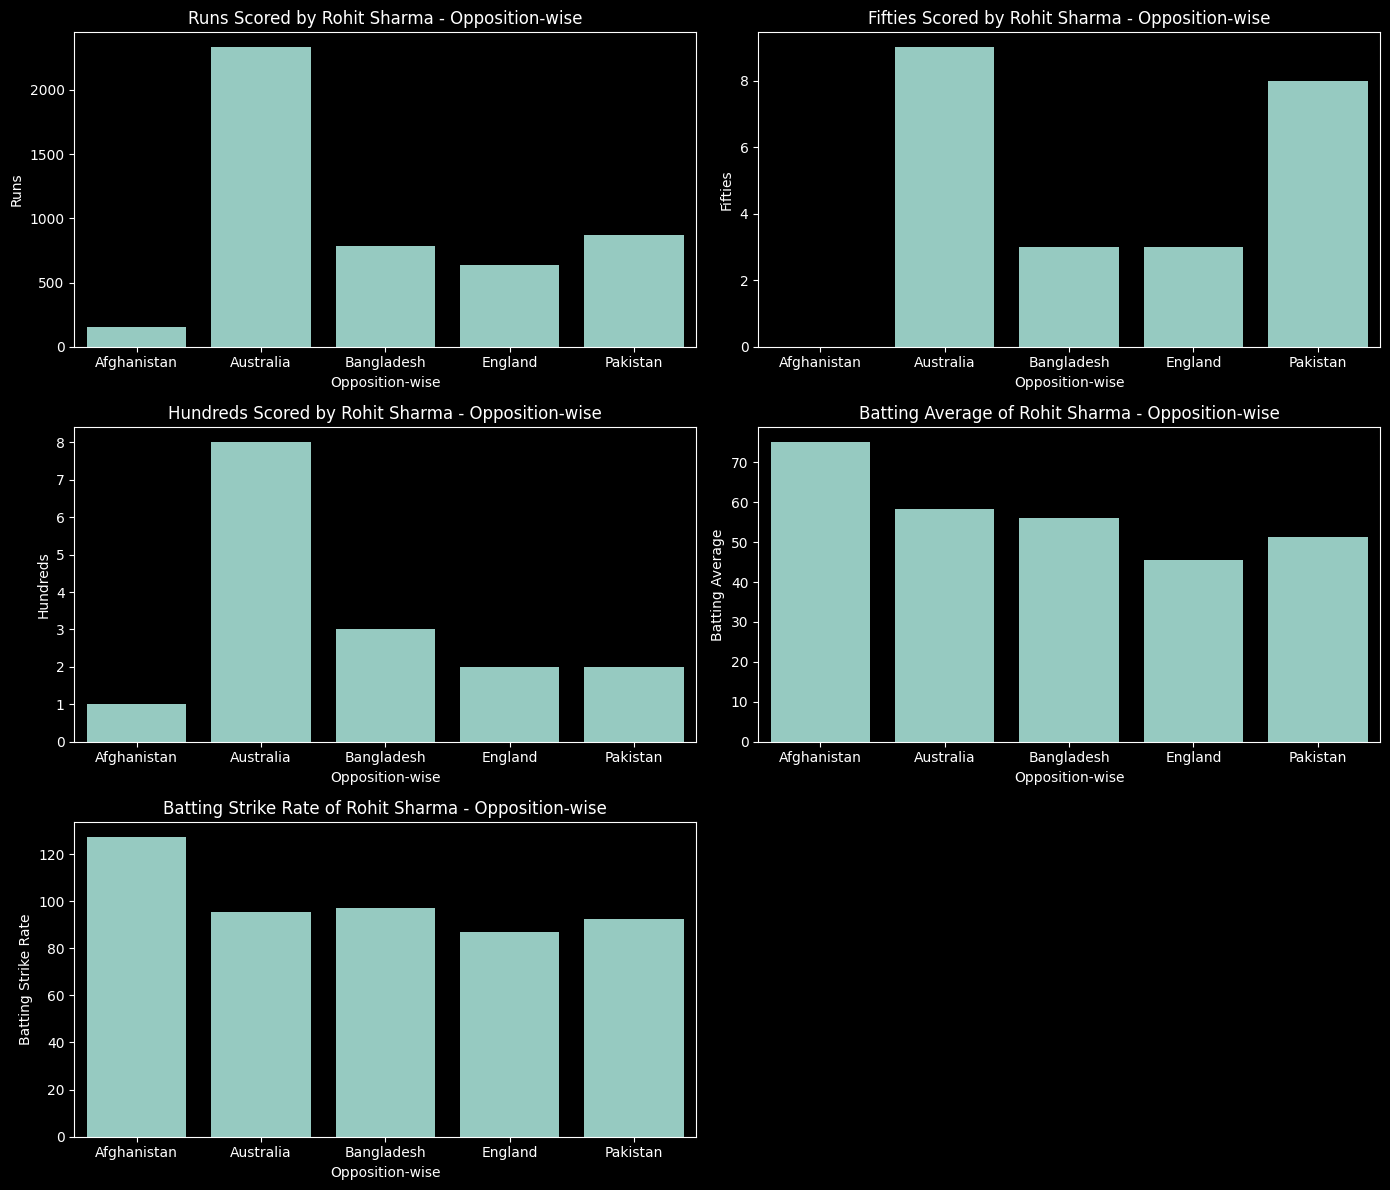

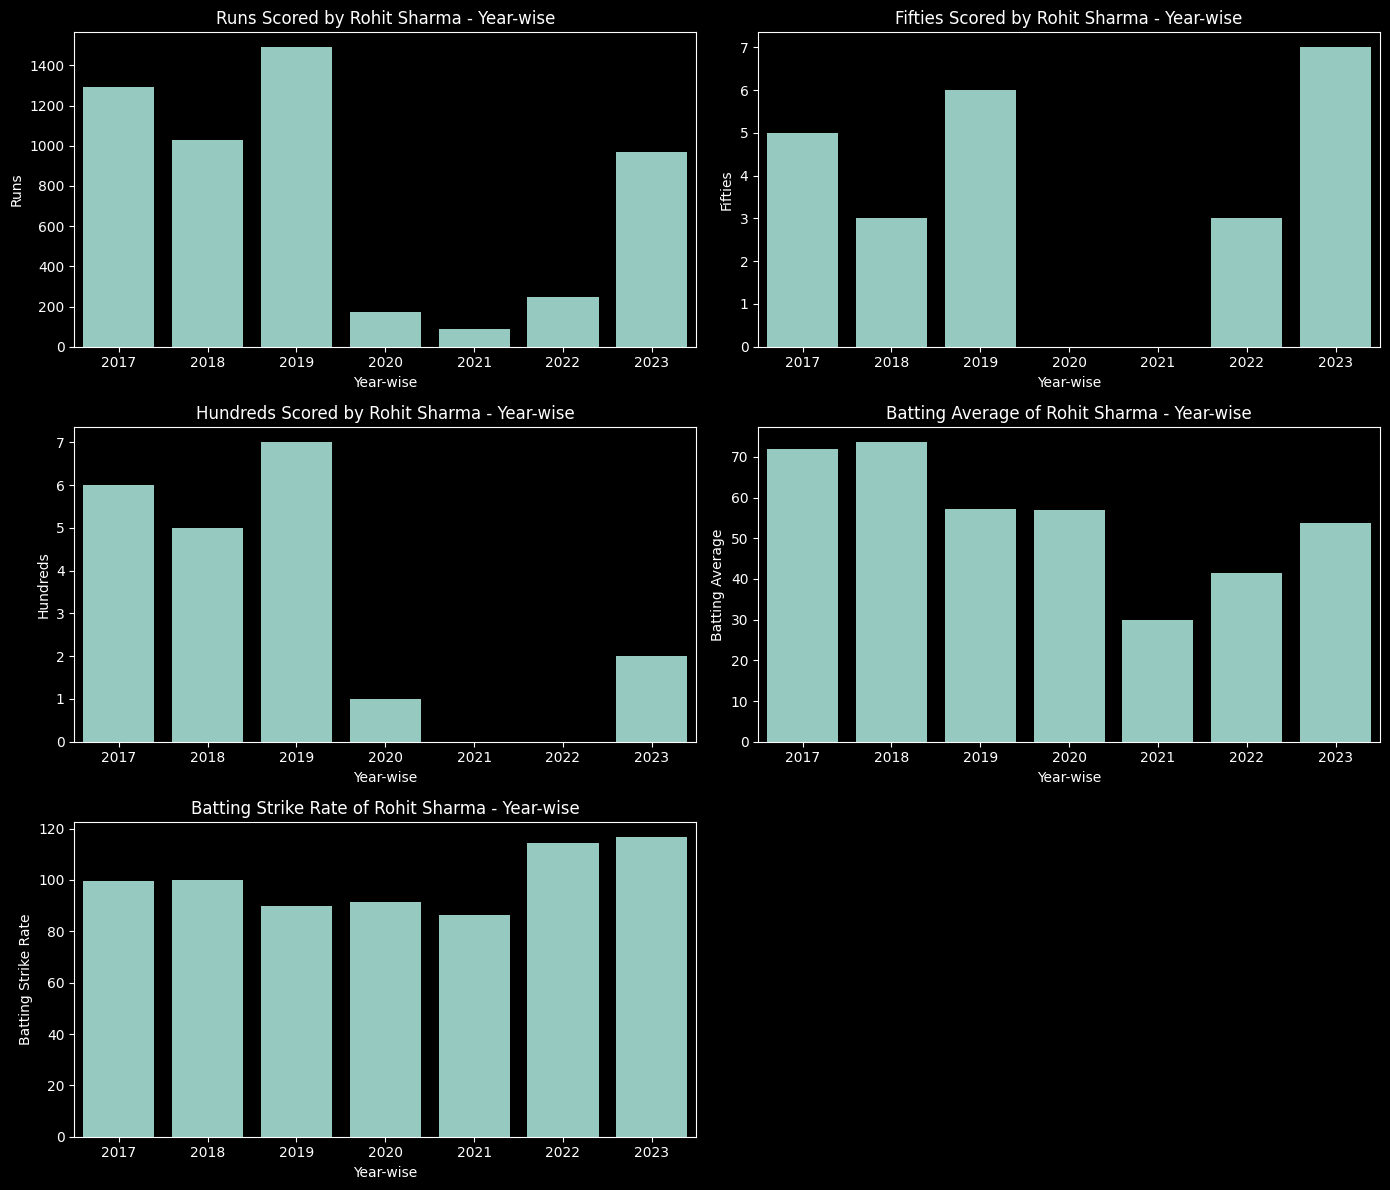

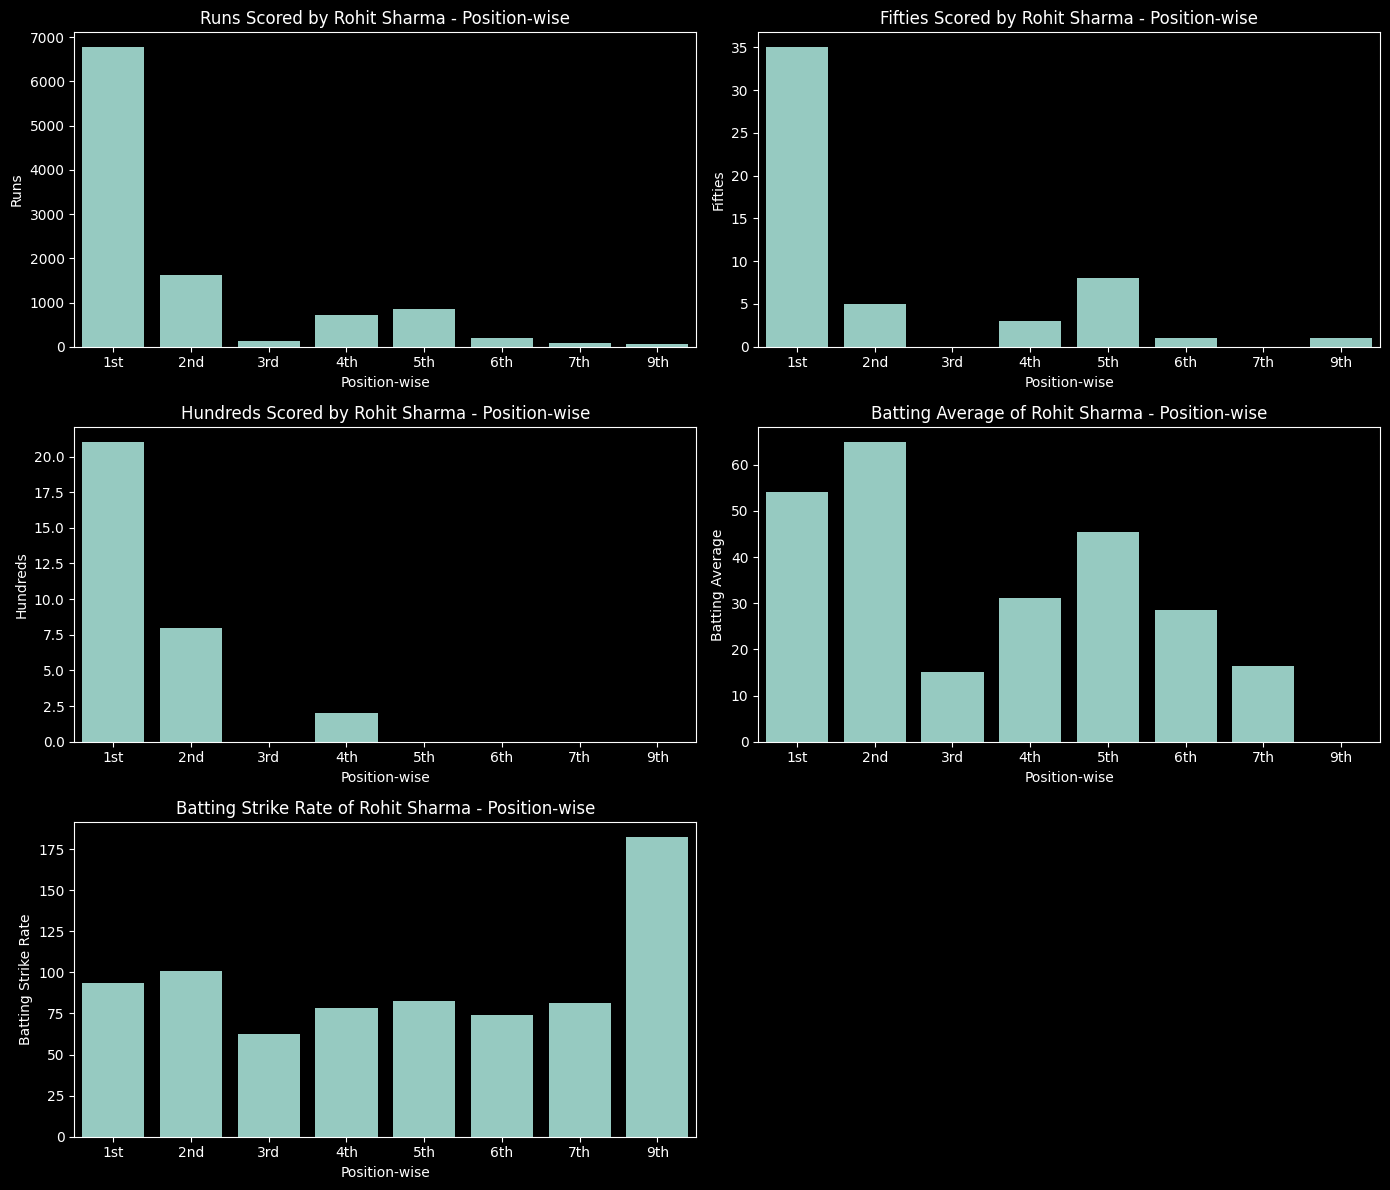

Hardik Pandya Batting Stats


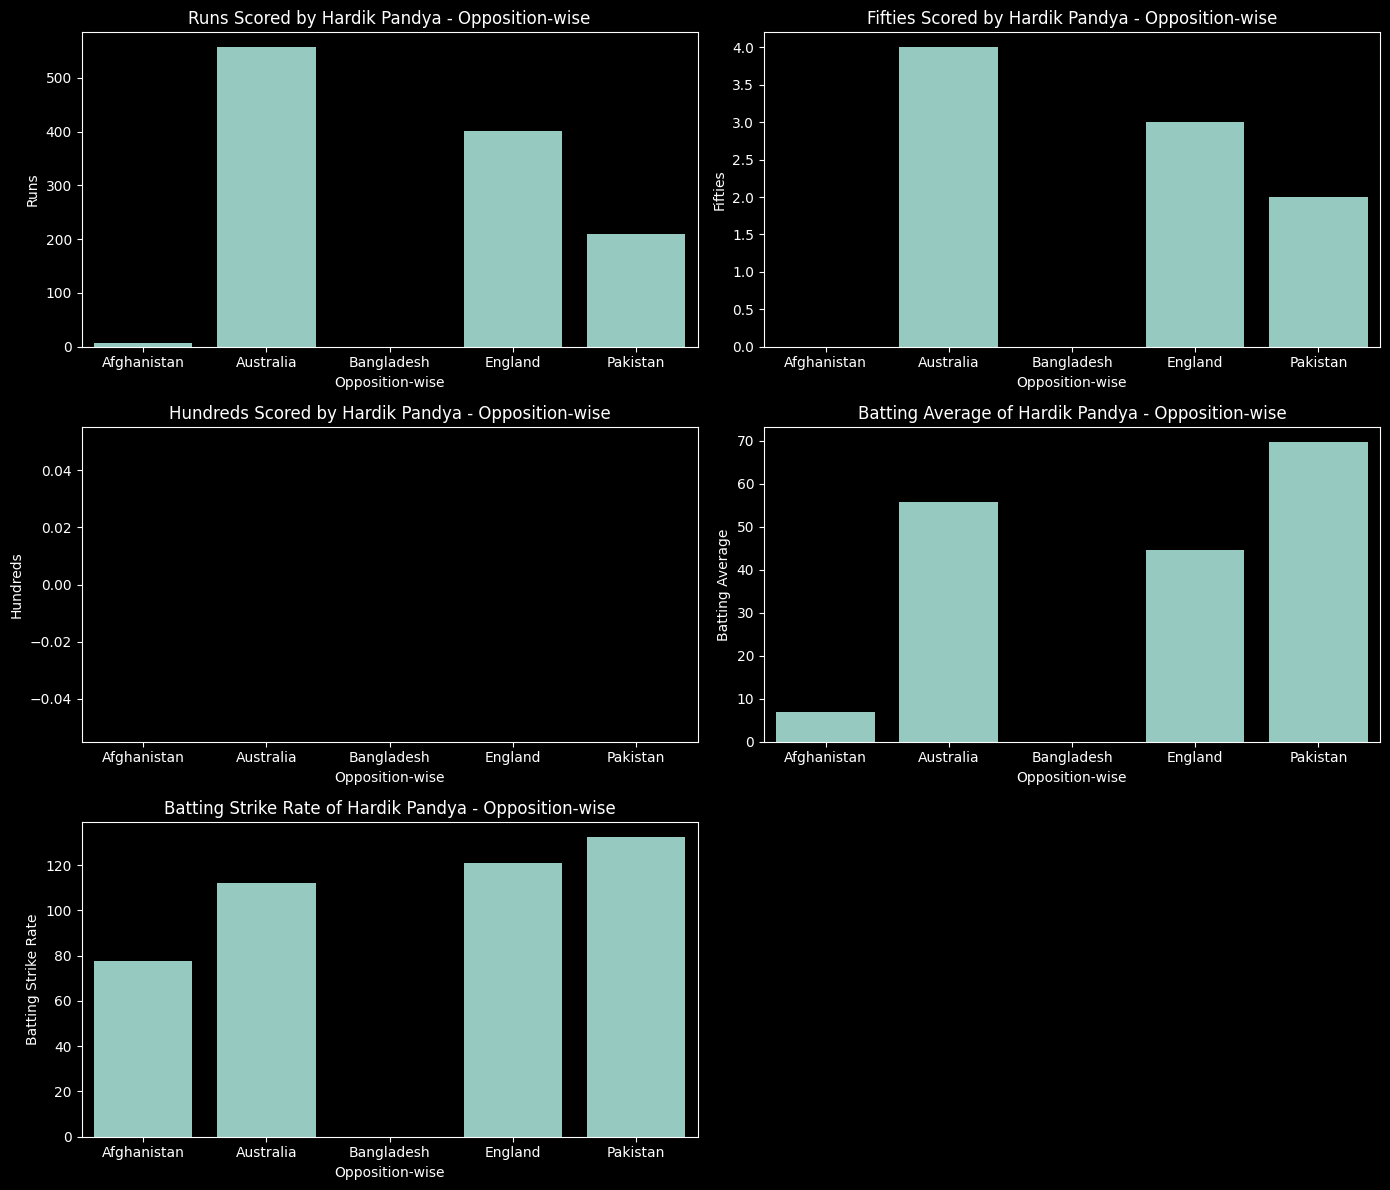

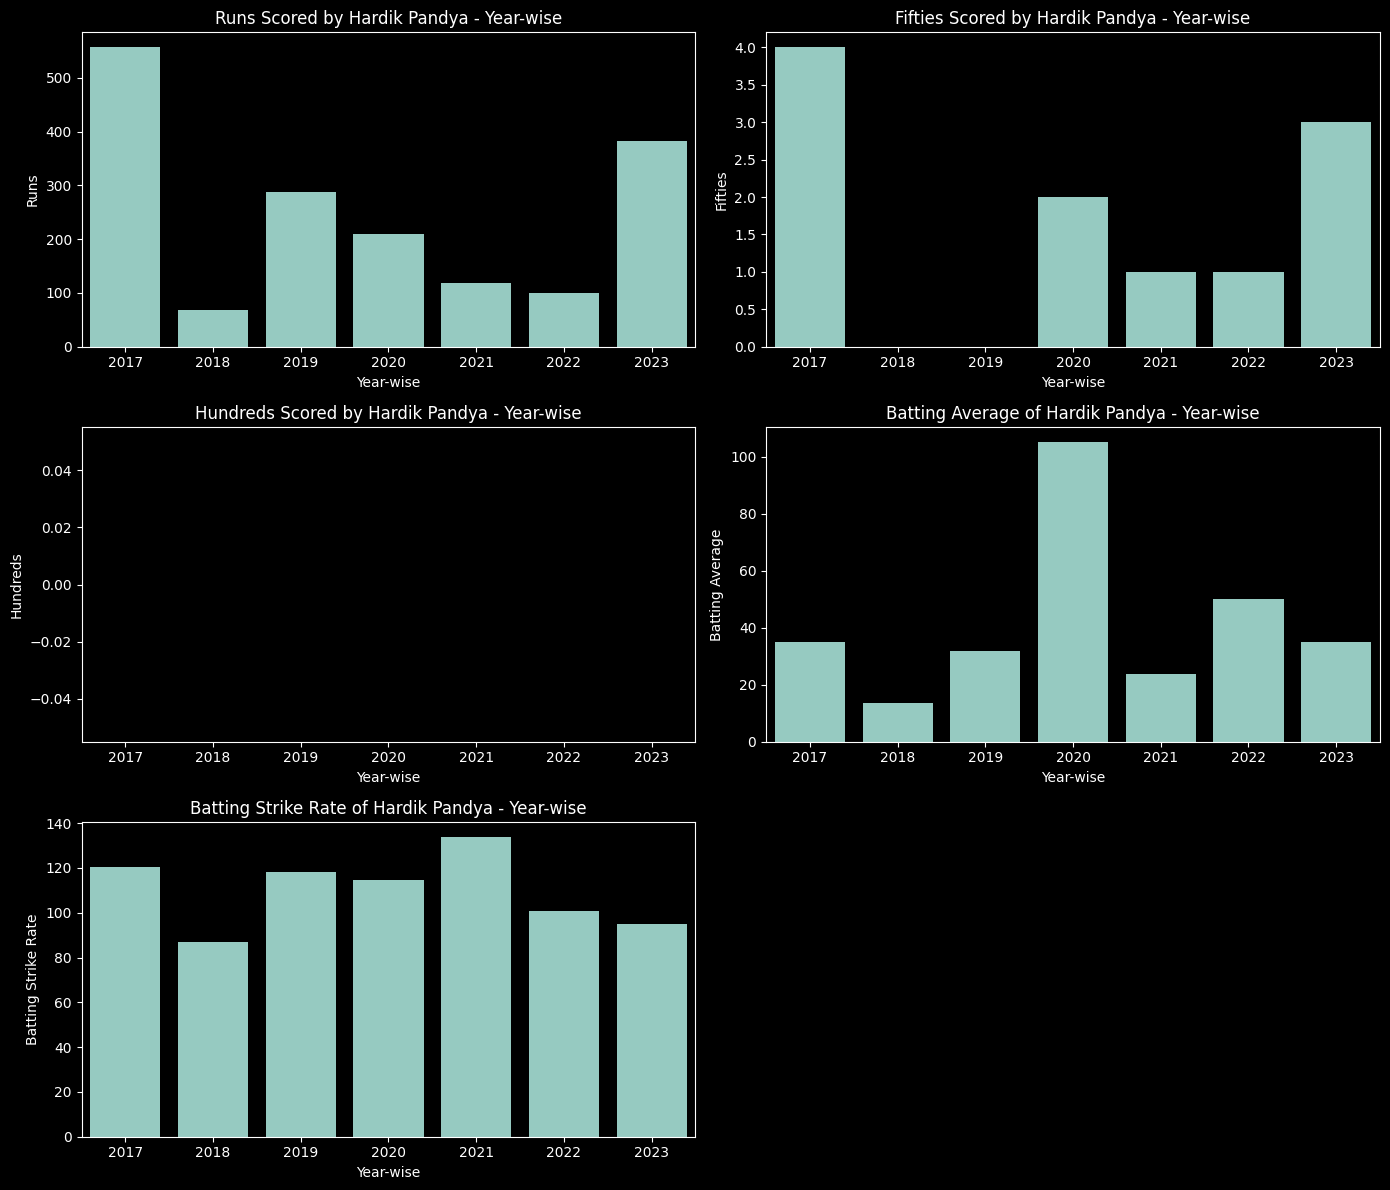

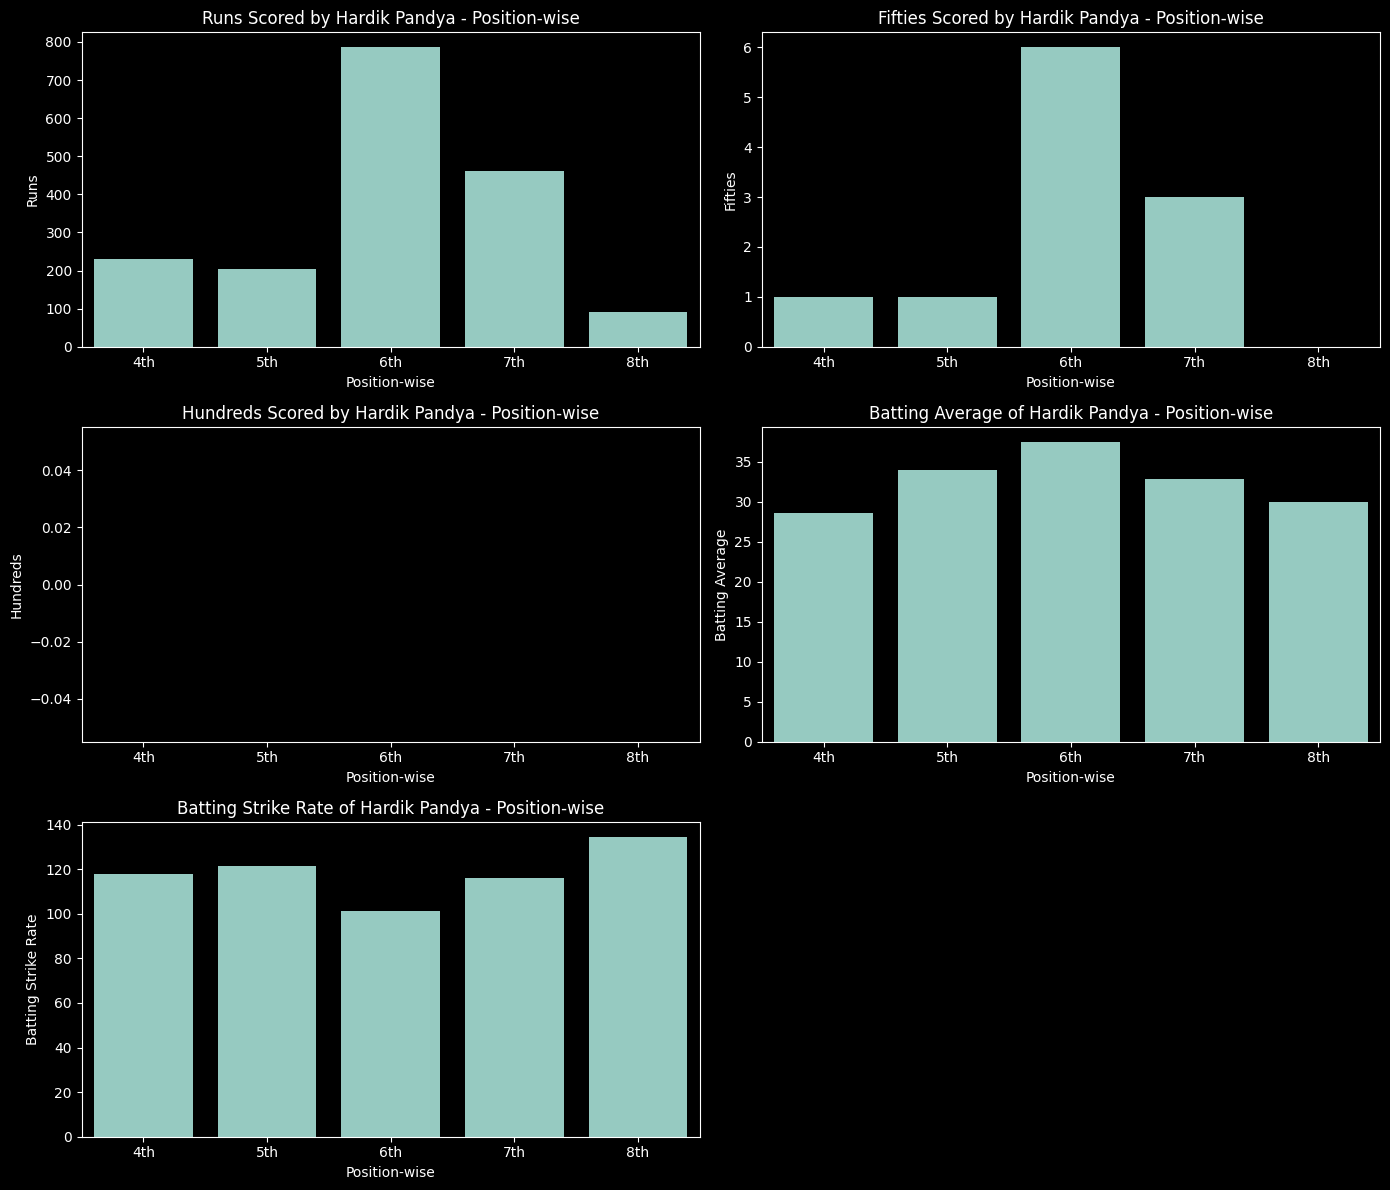

Shubman Gill Batting Stats


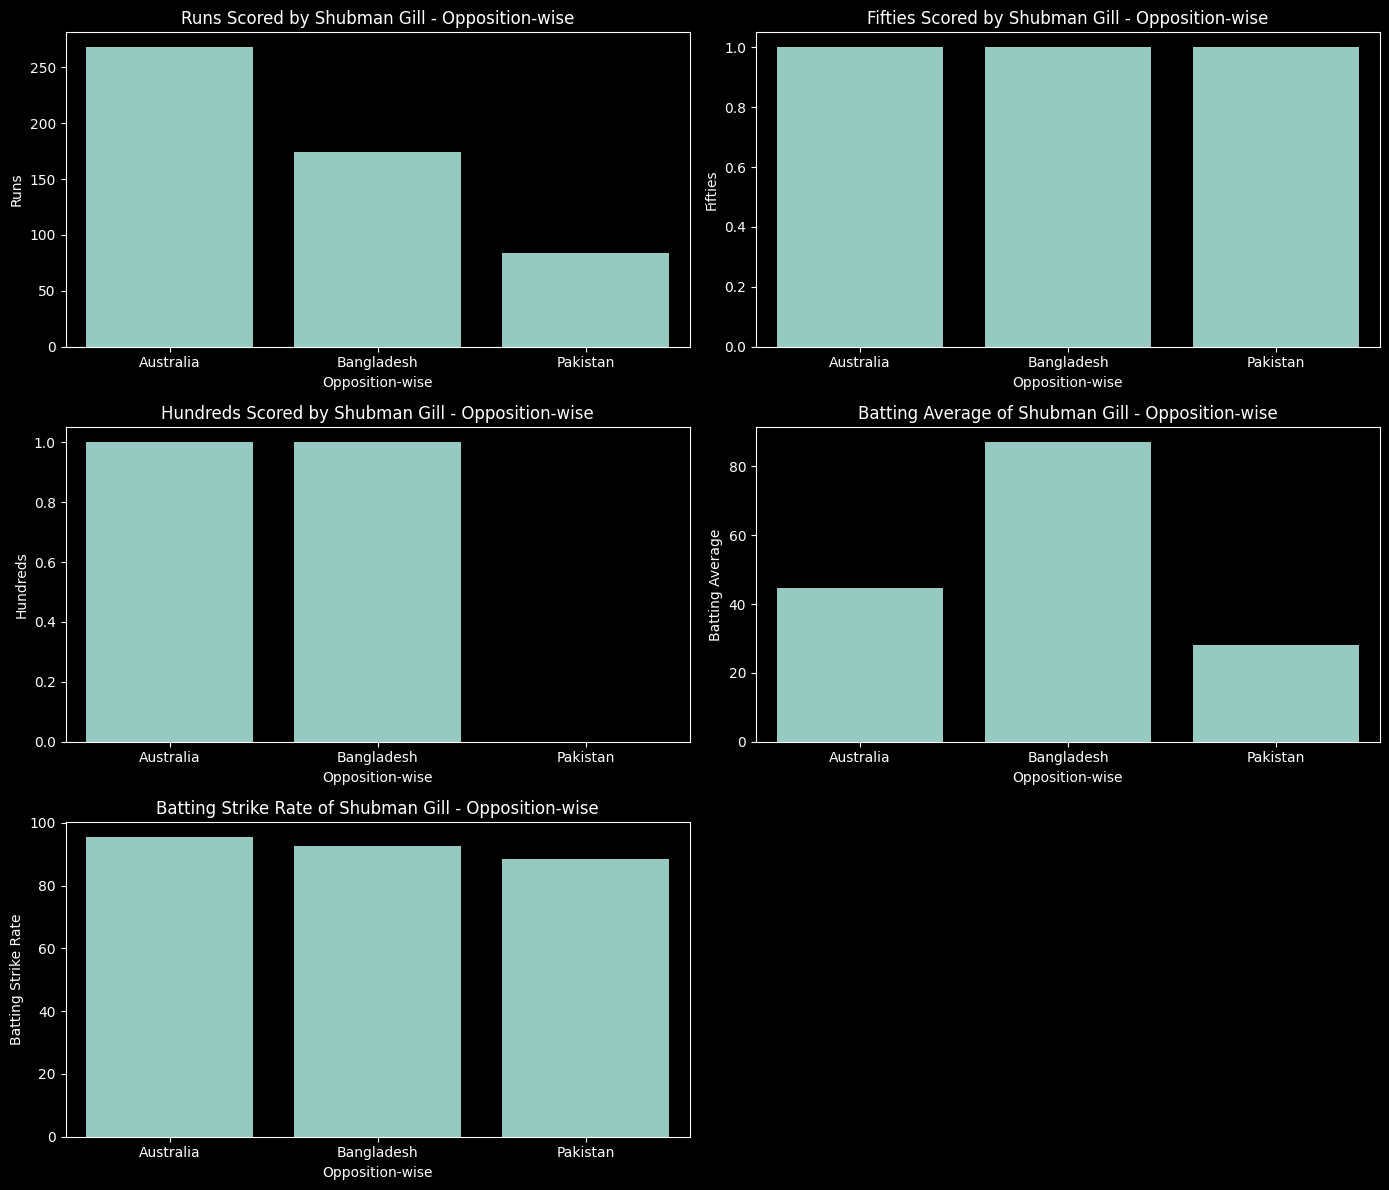

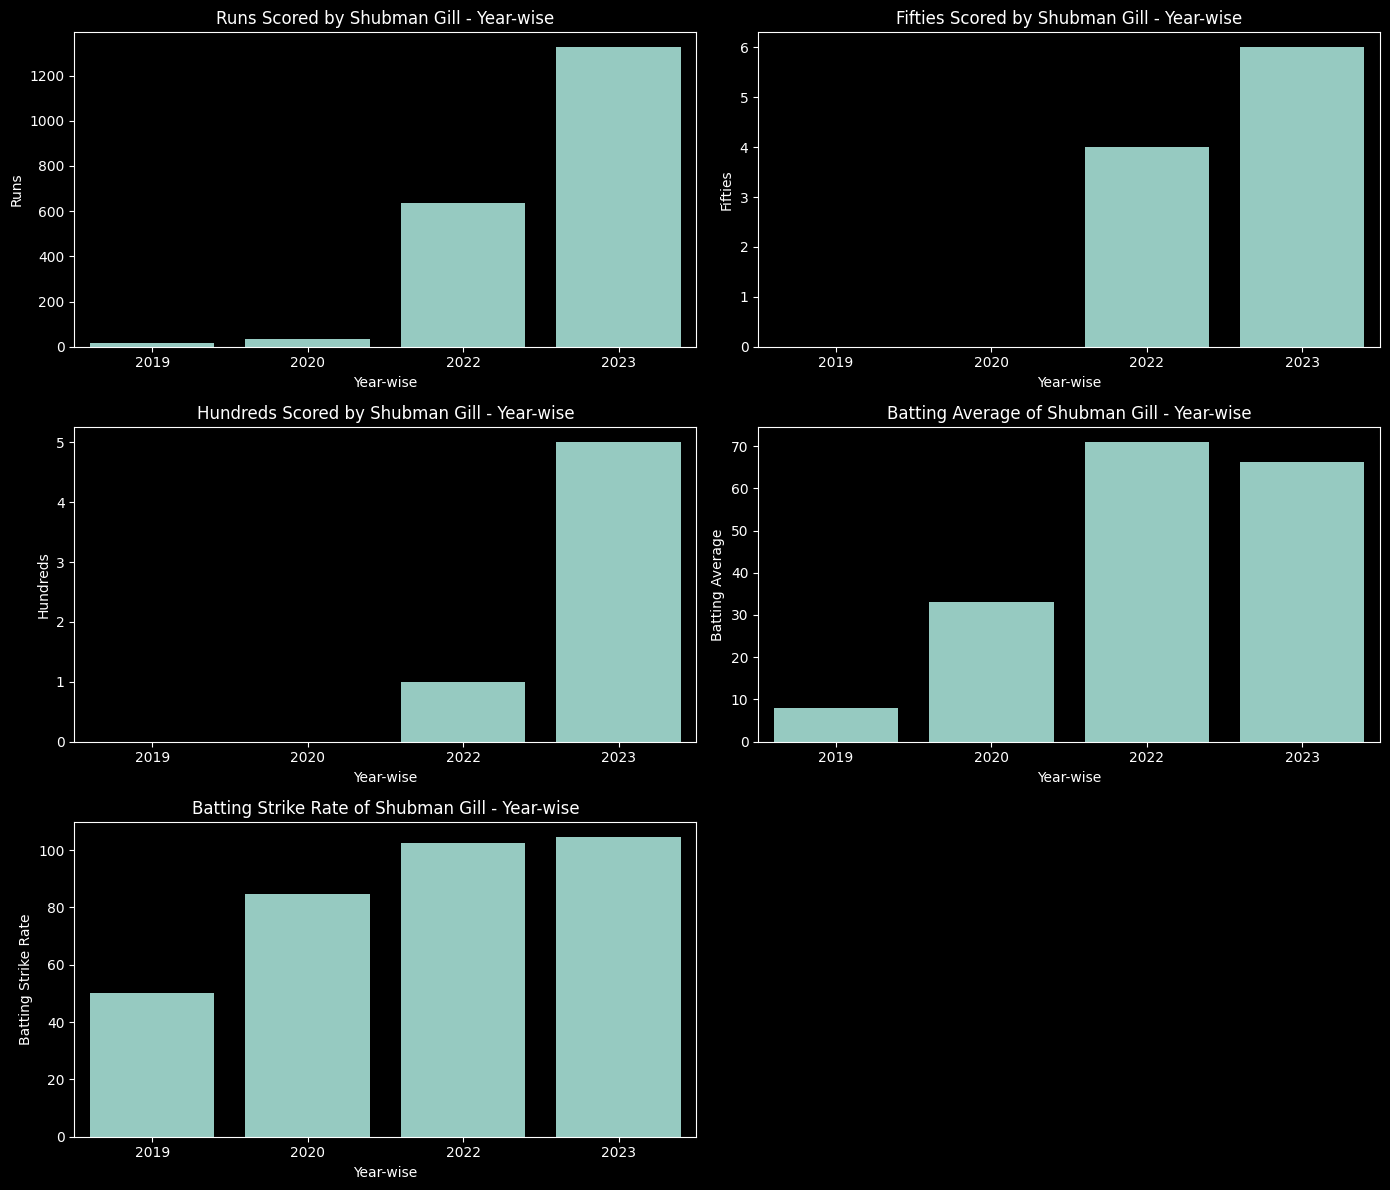

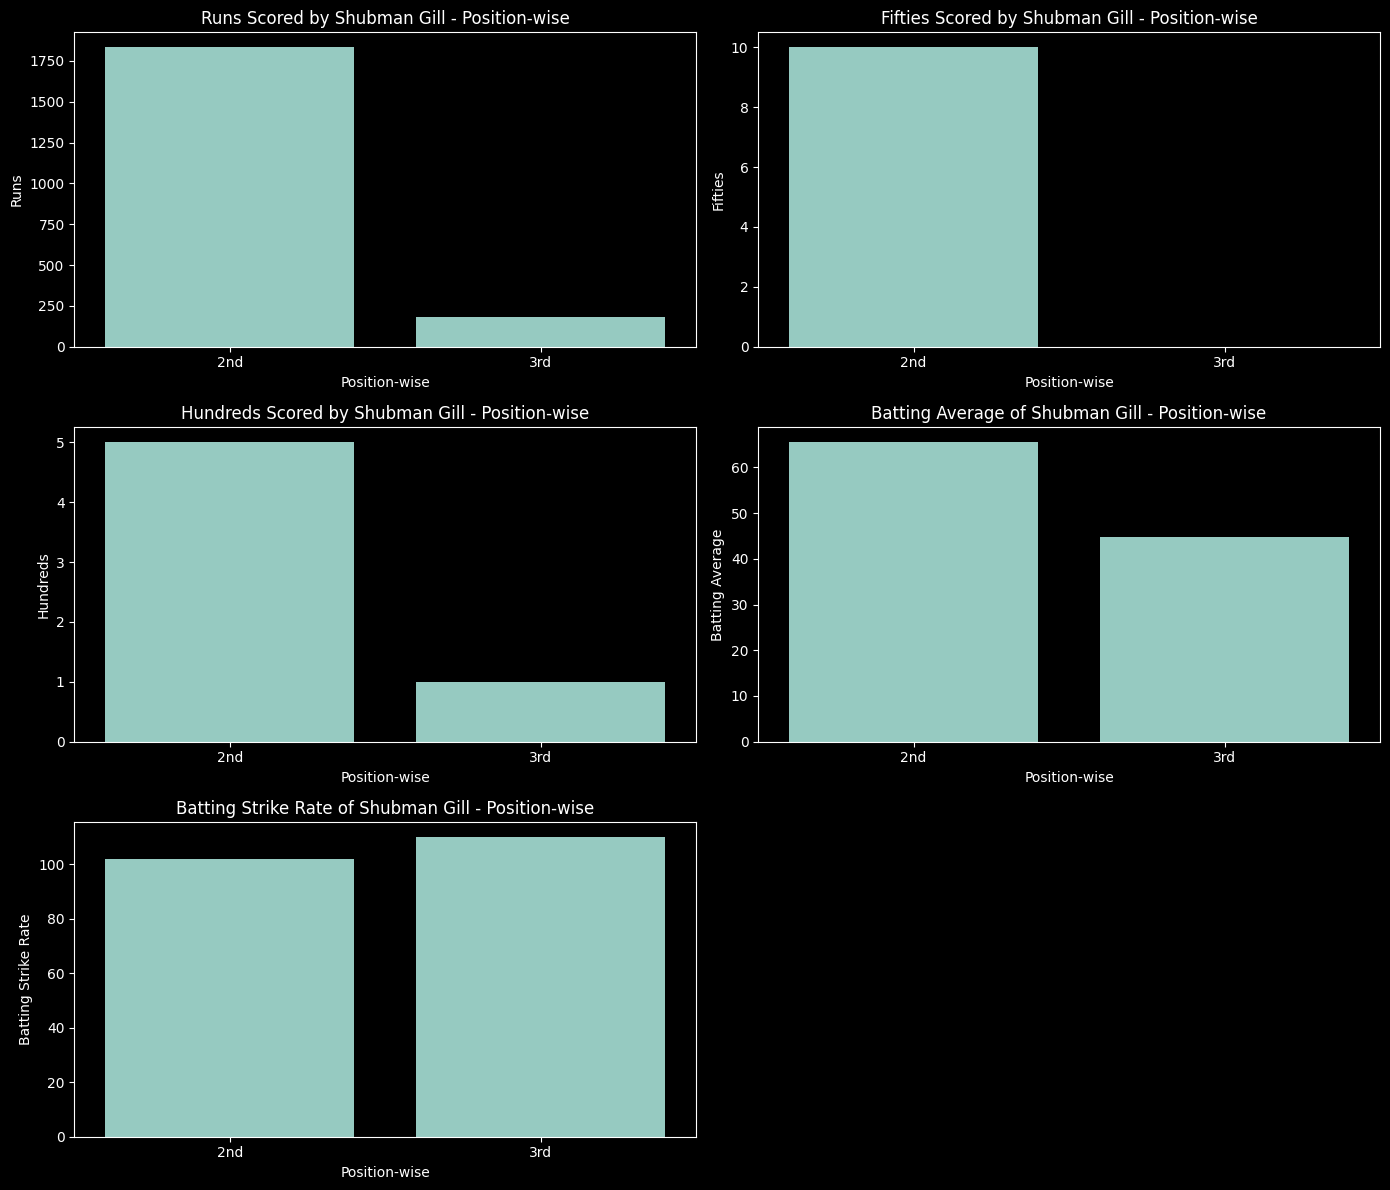

Virat Kohli Batting Stats


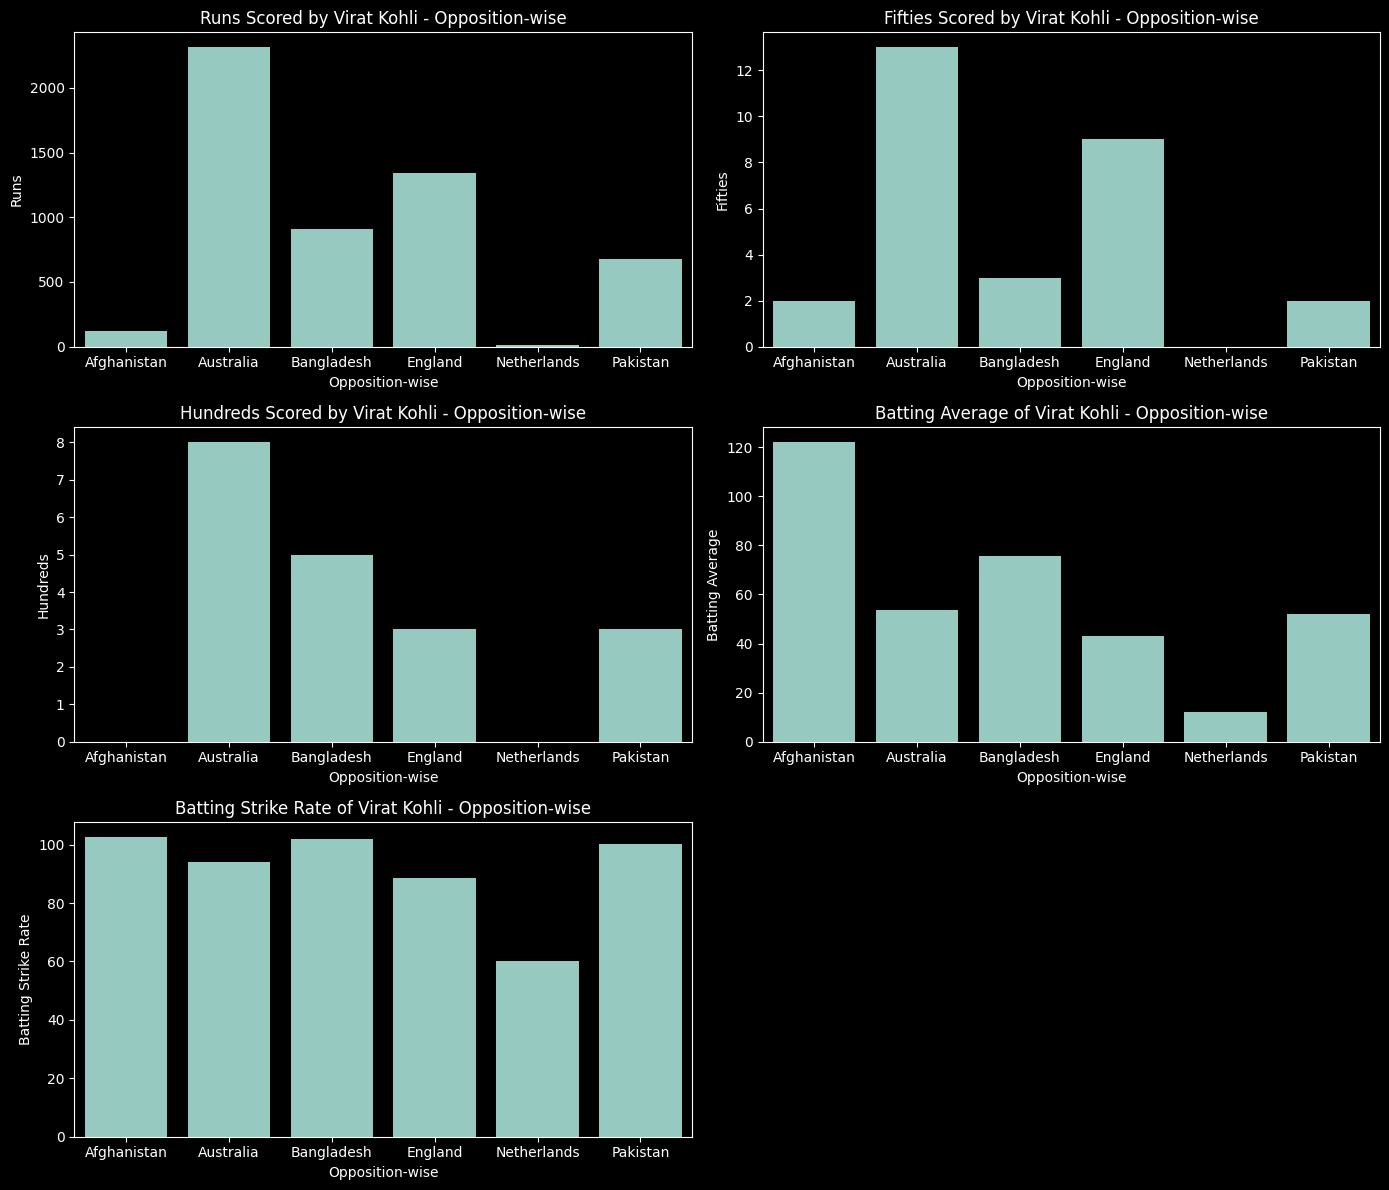

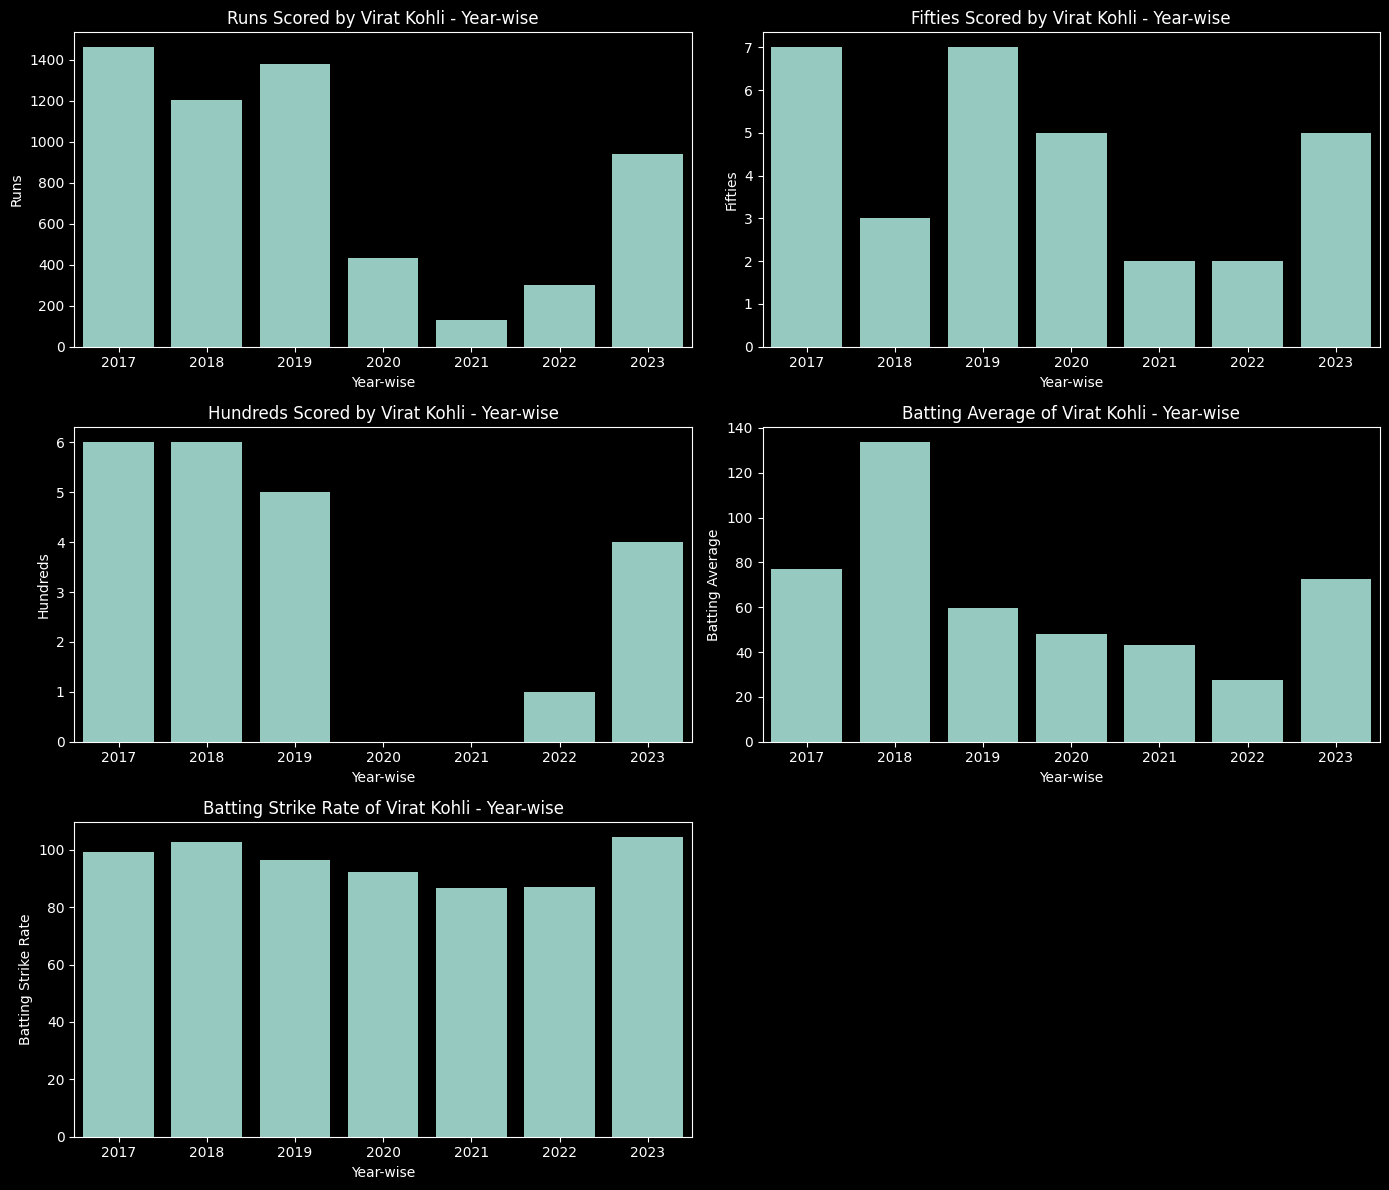

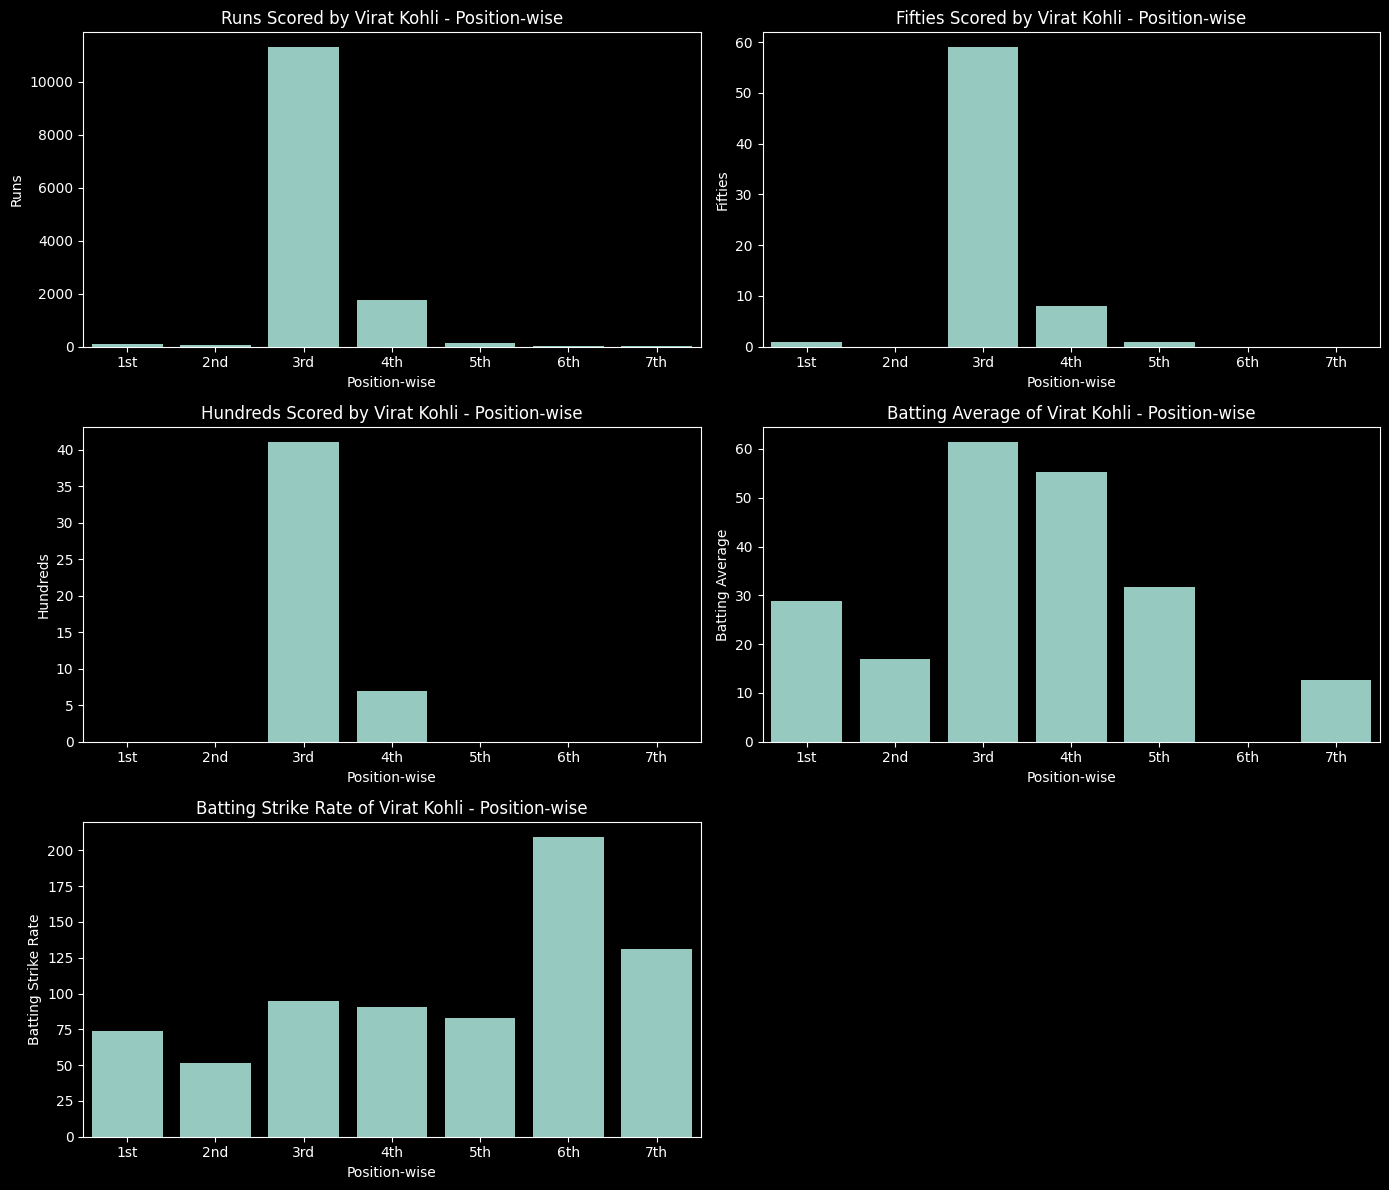

Shreyas Iyer Batting Stats


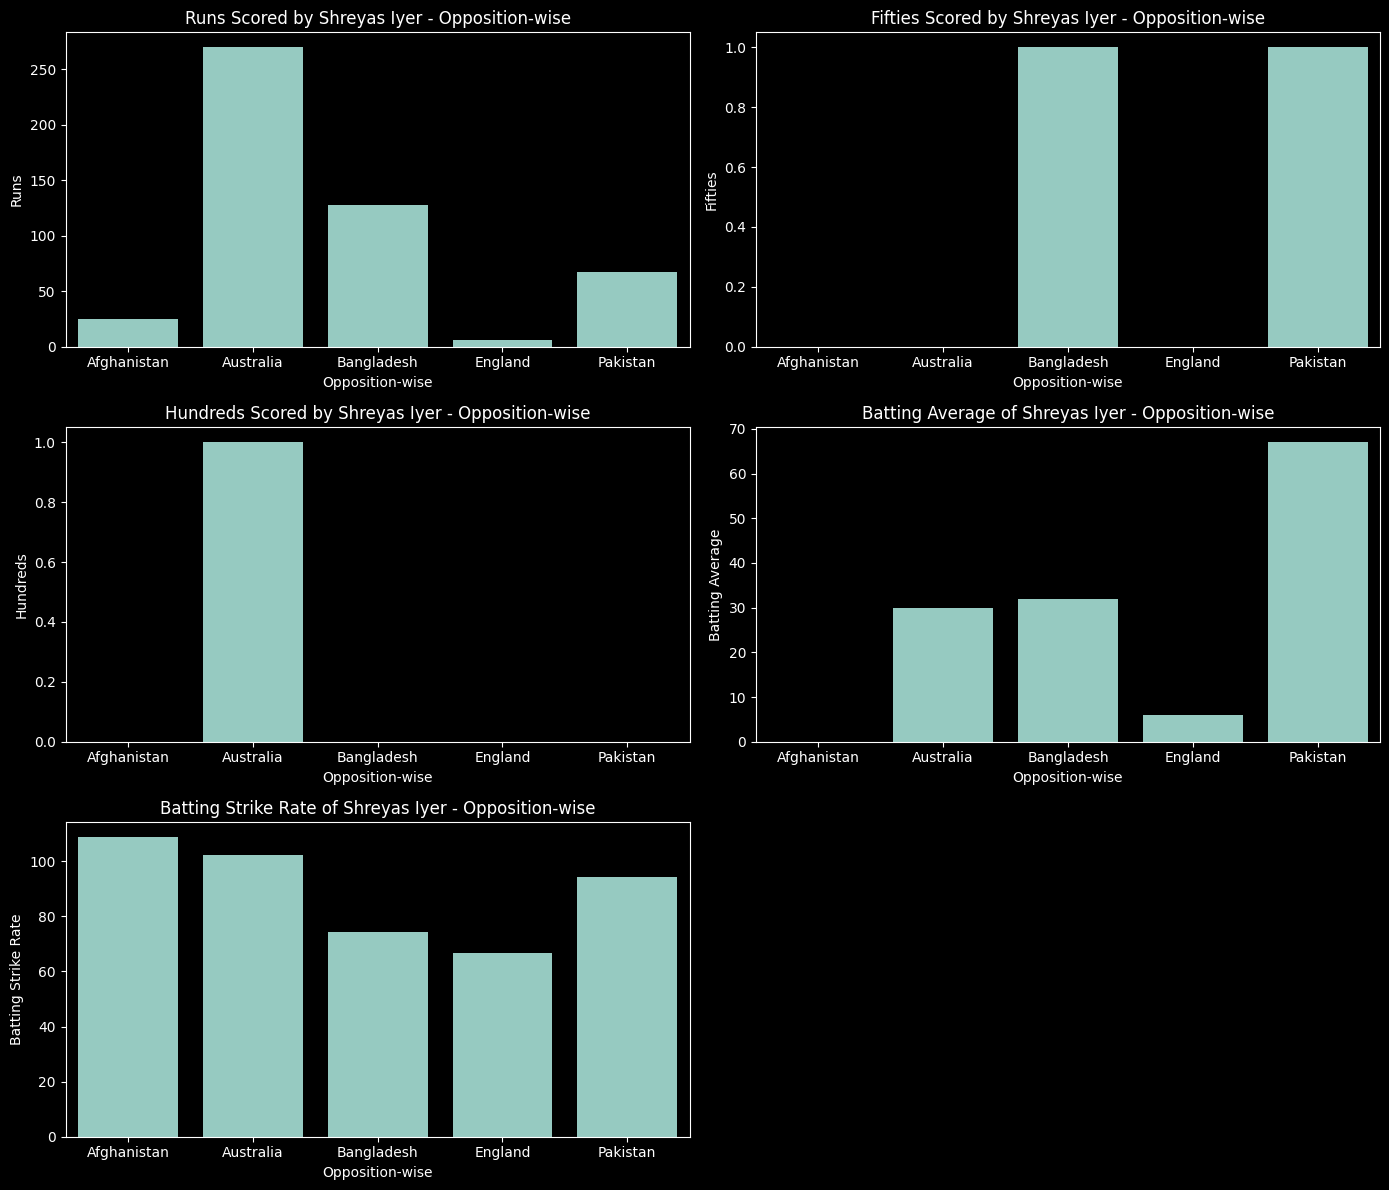

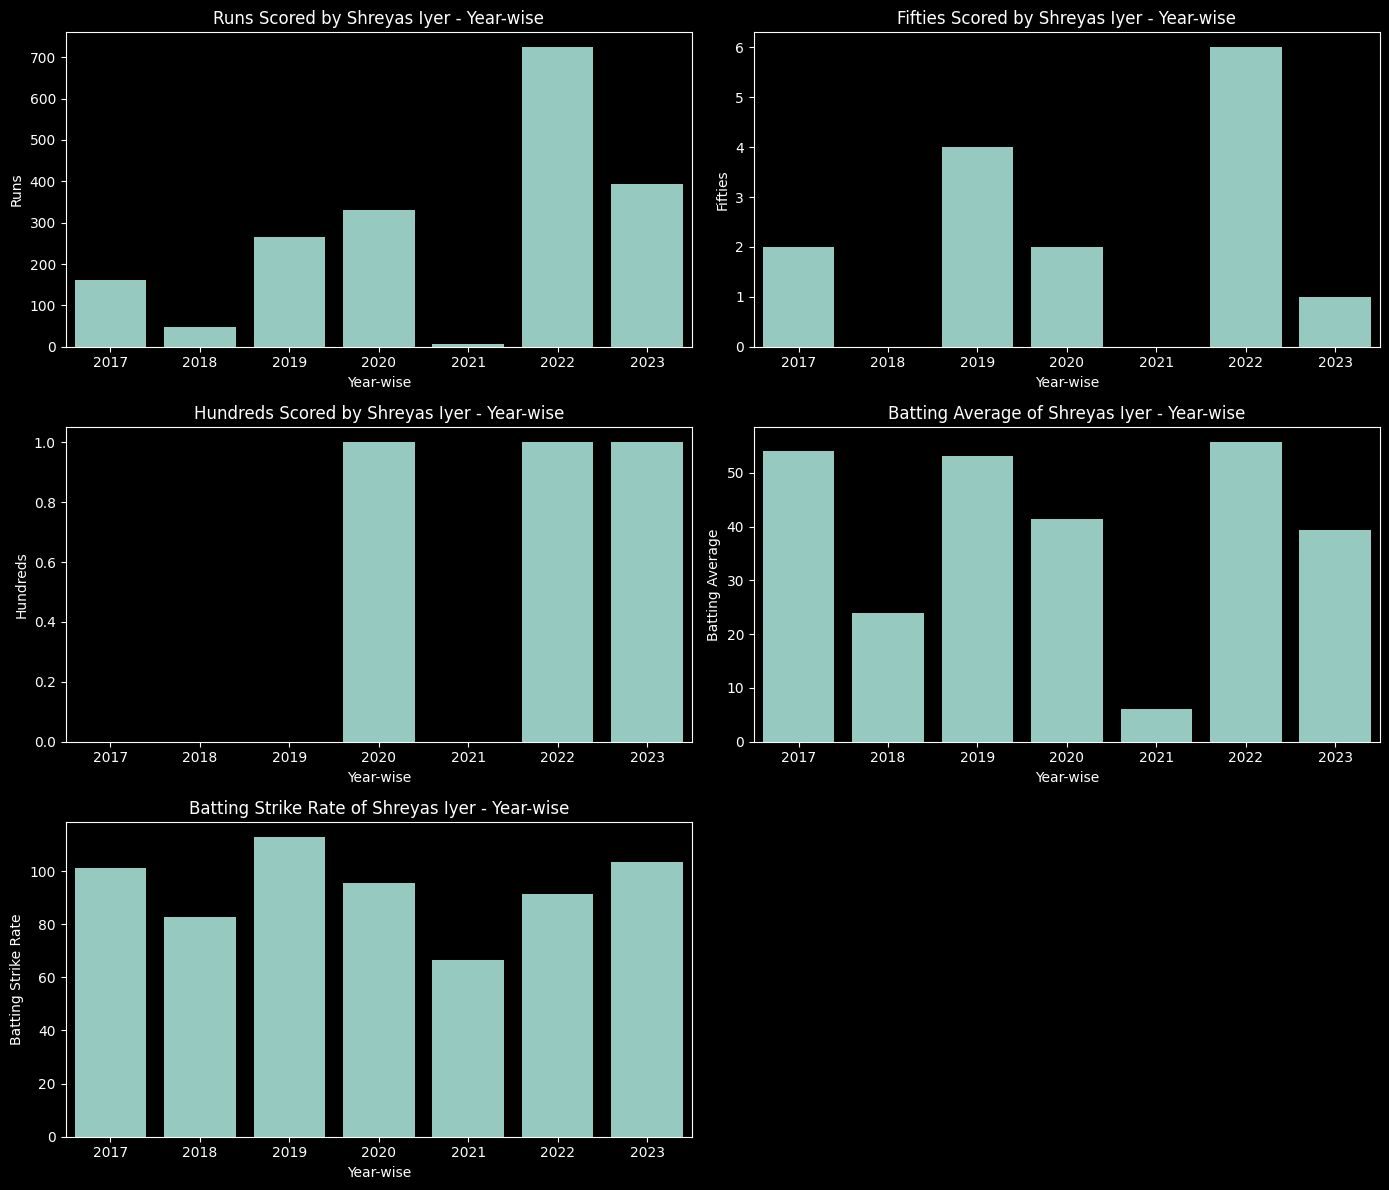

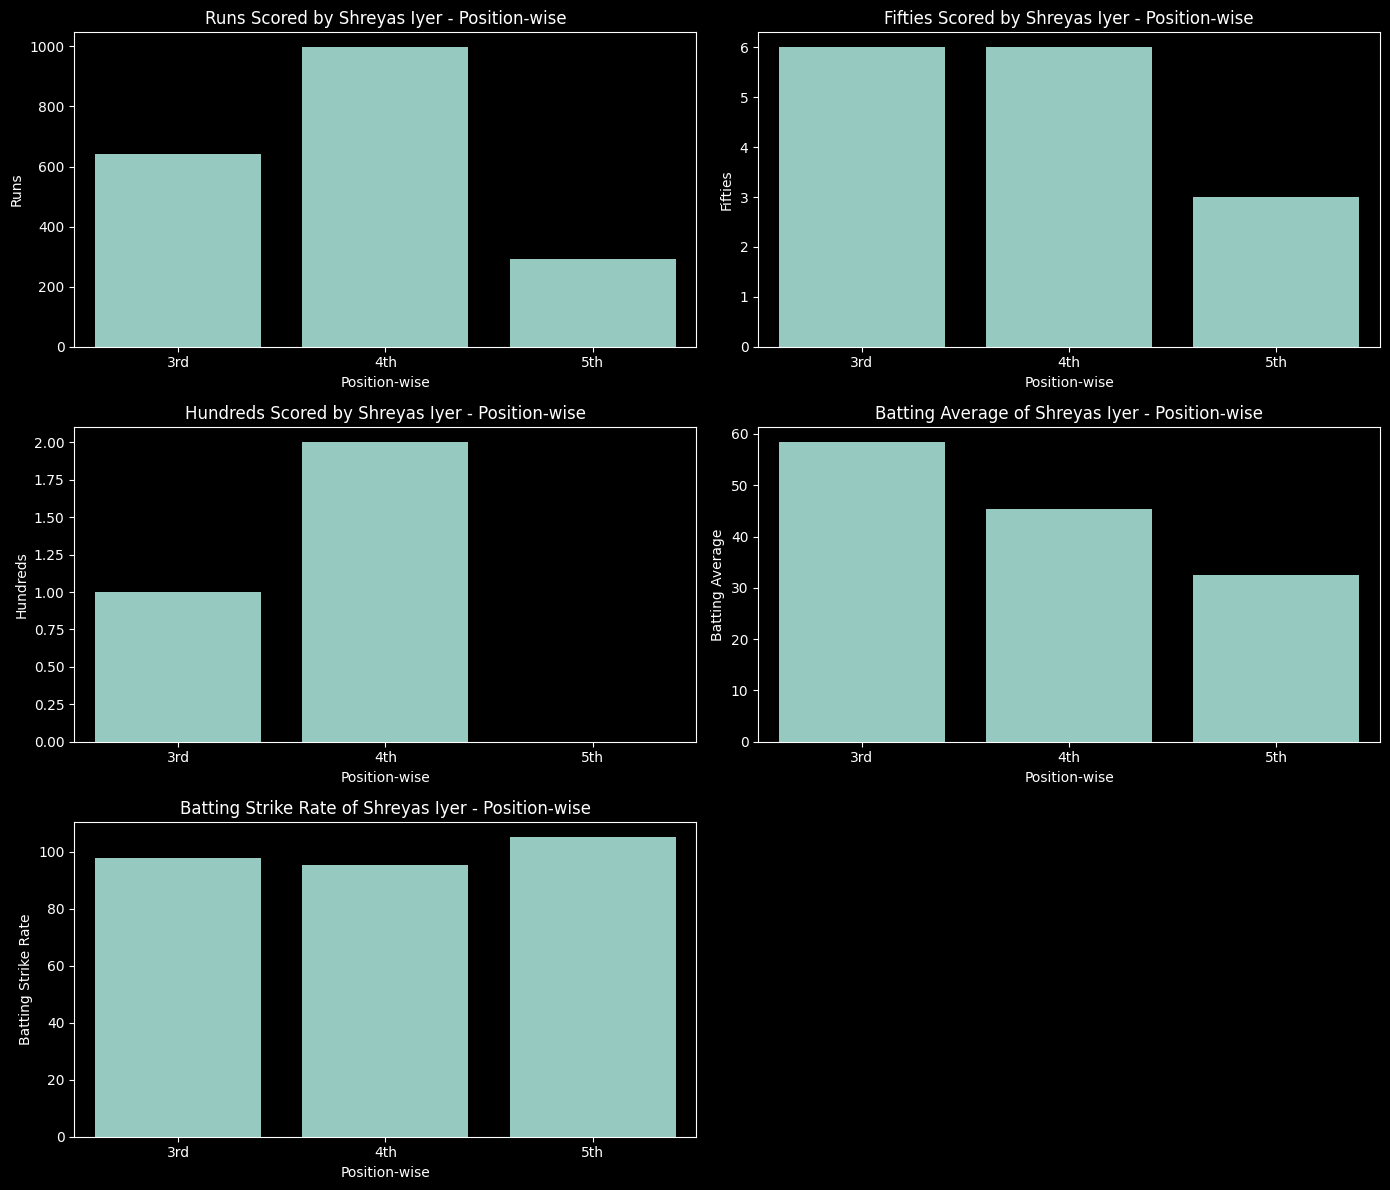

Ishan Kishan Batting Stats


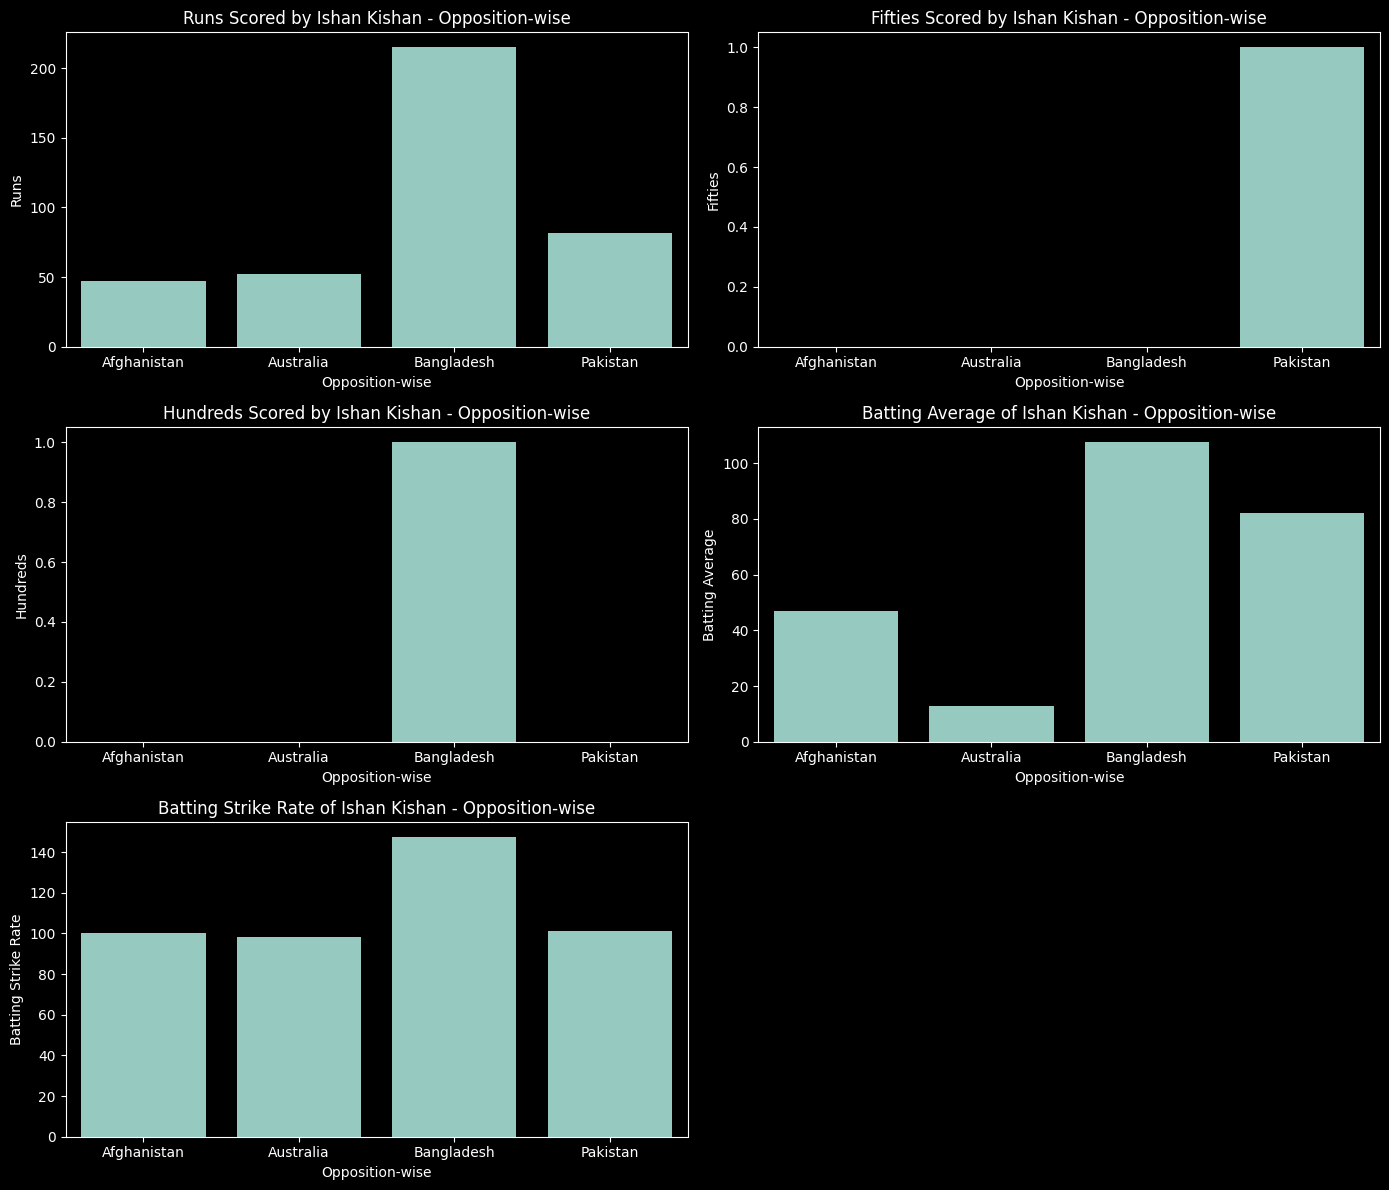

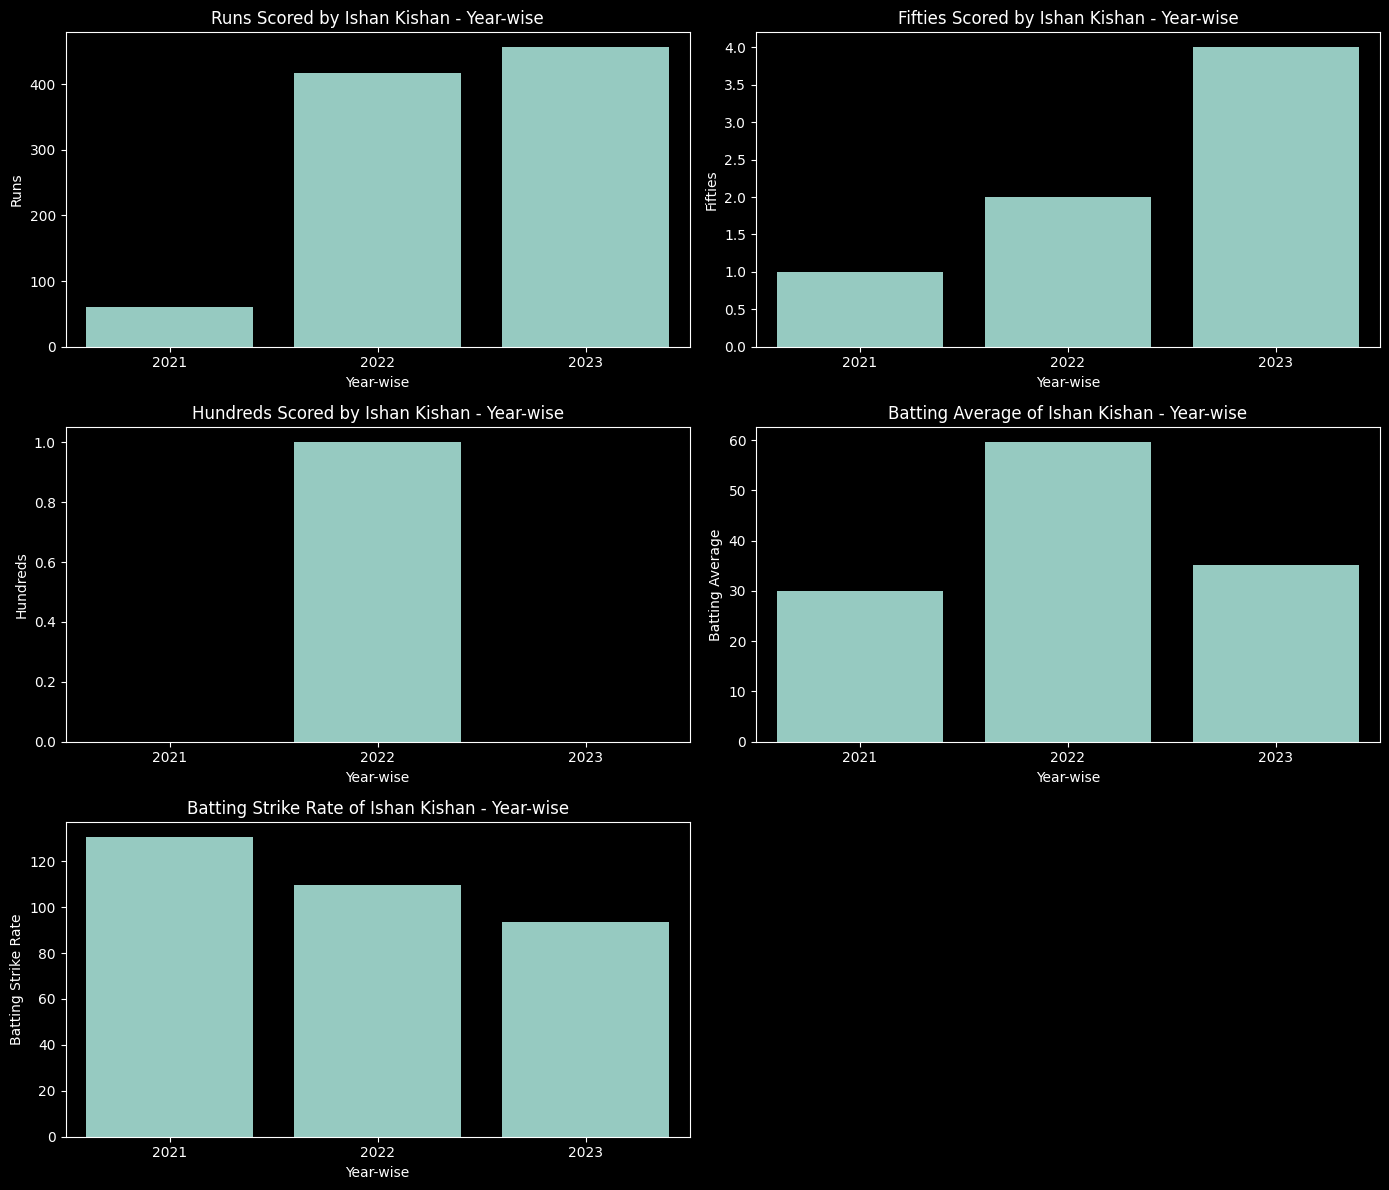

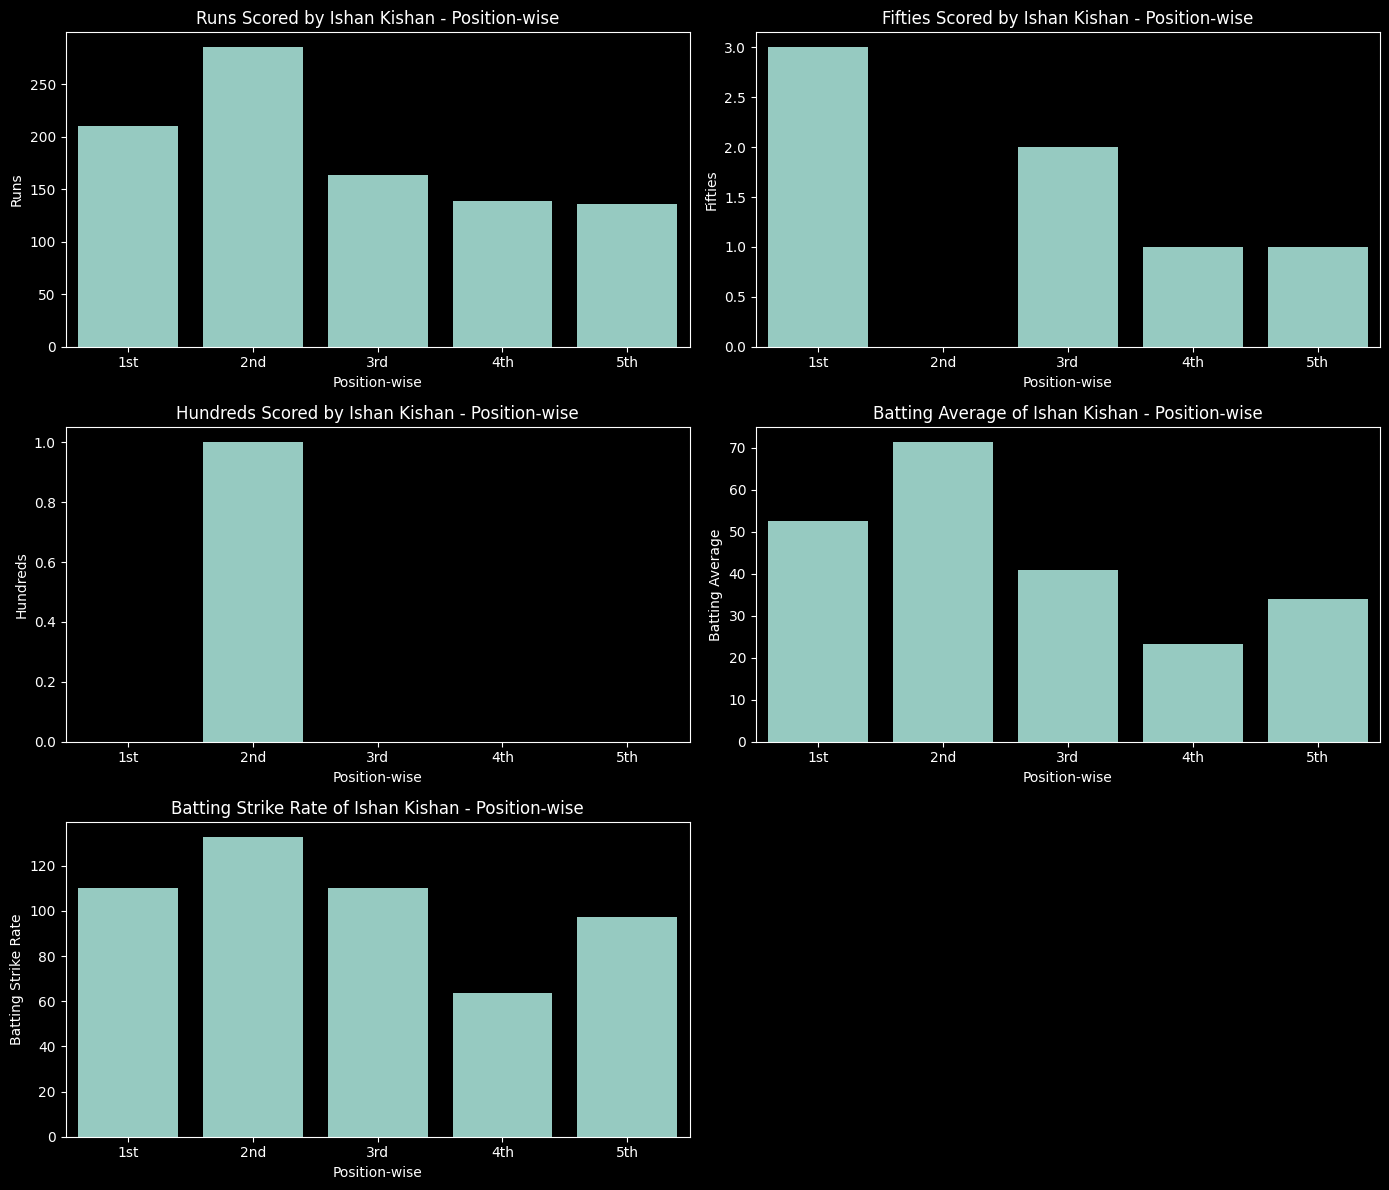

KL Rahul Batting Stats


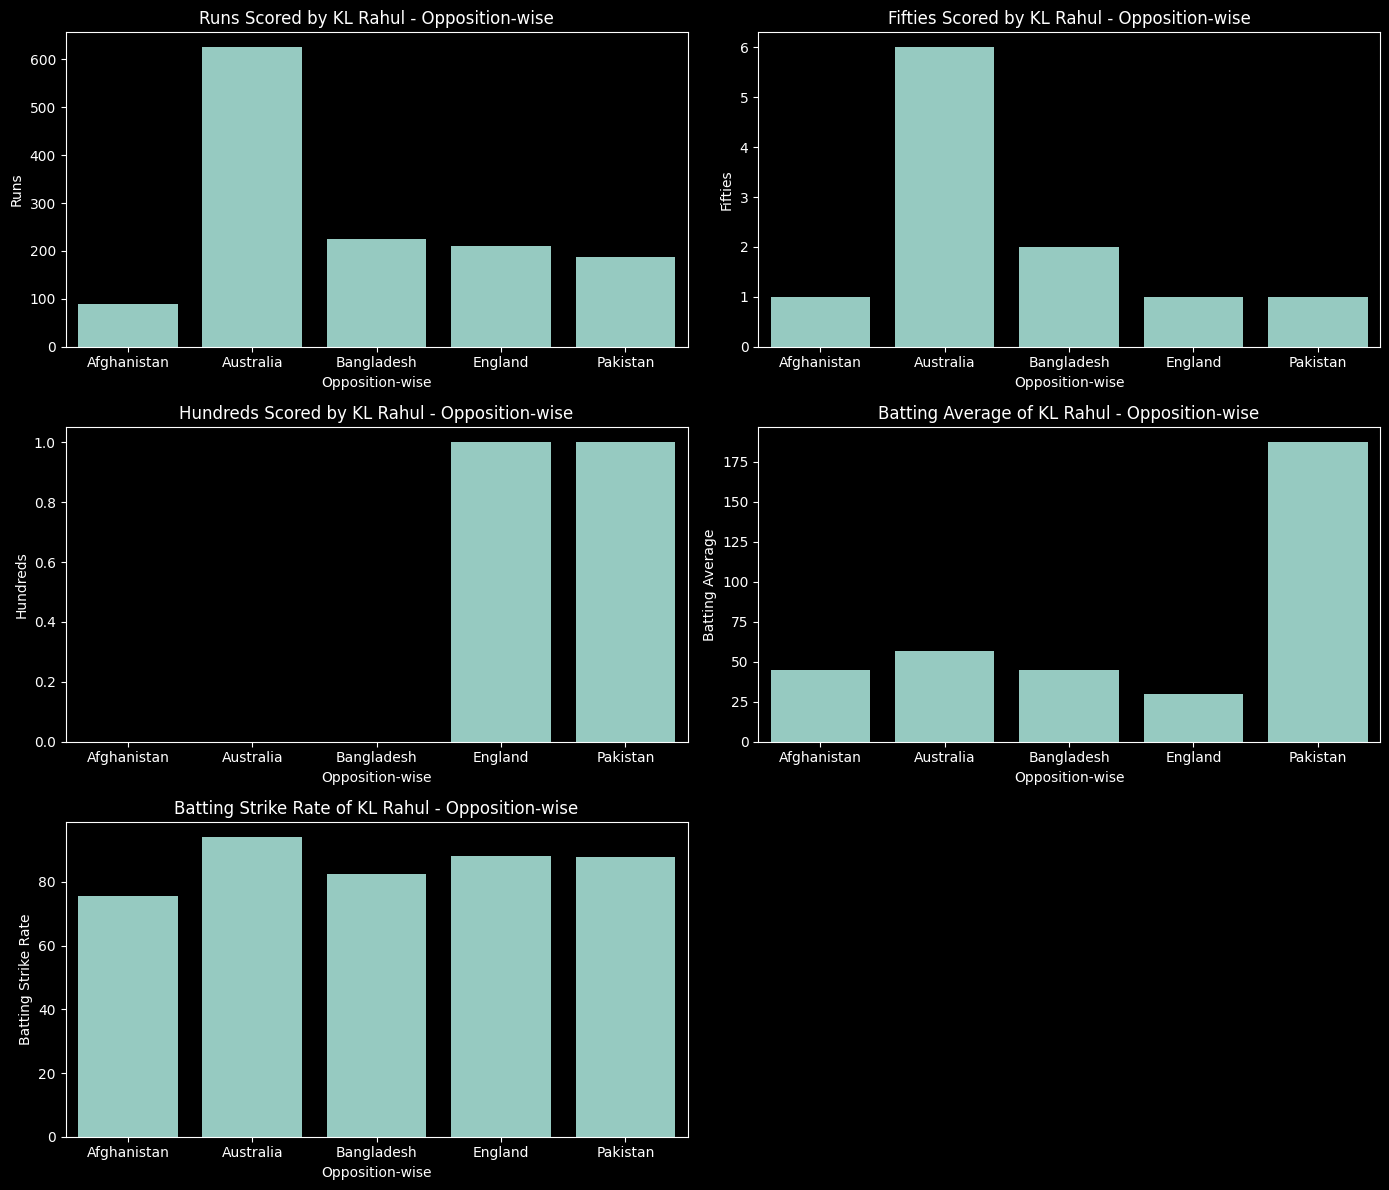

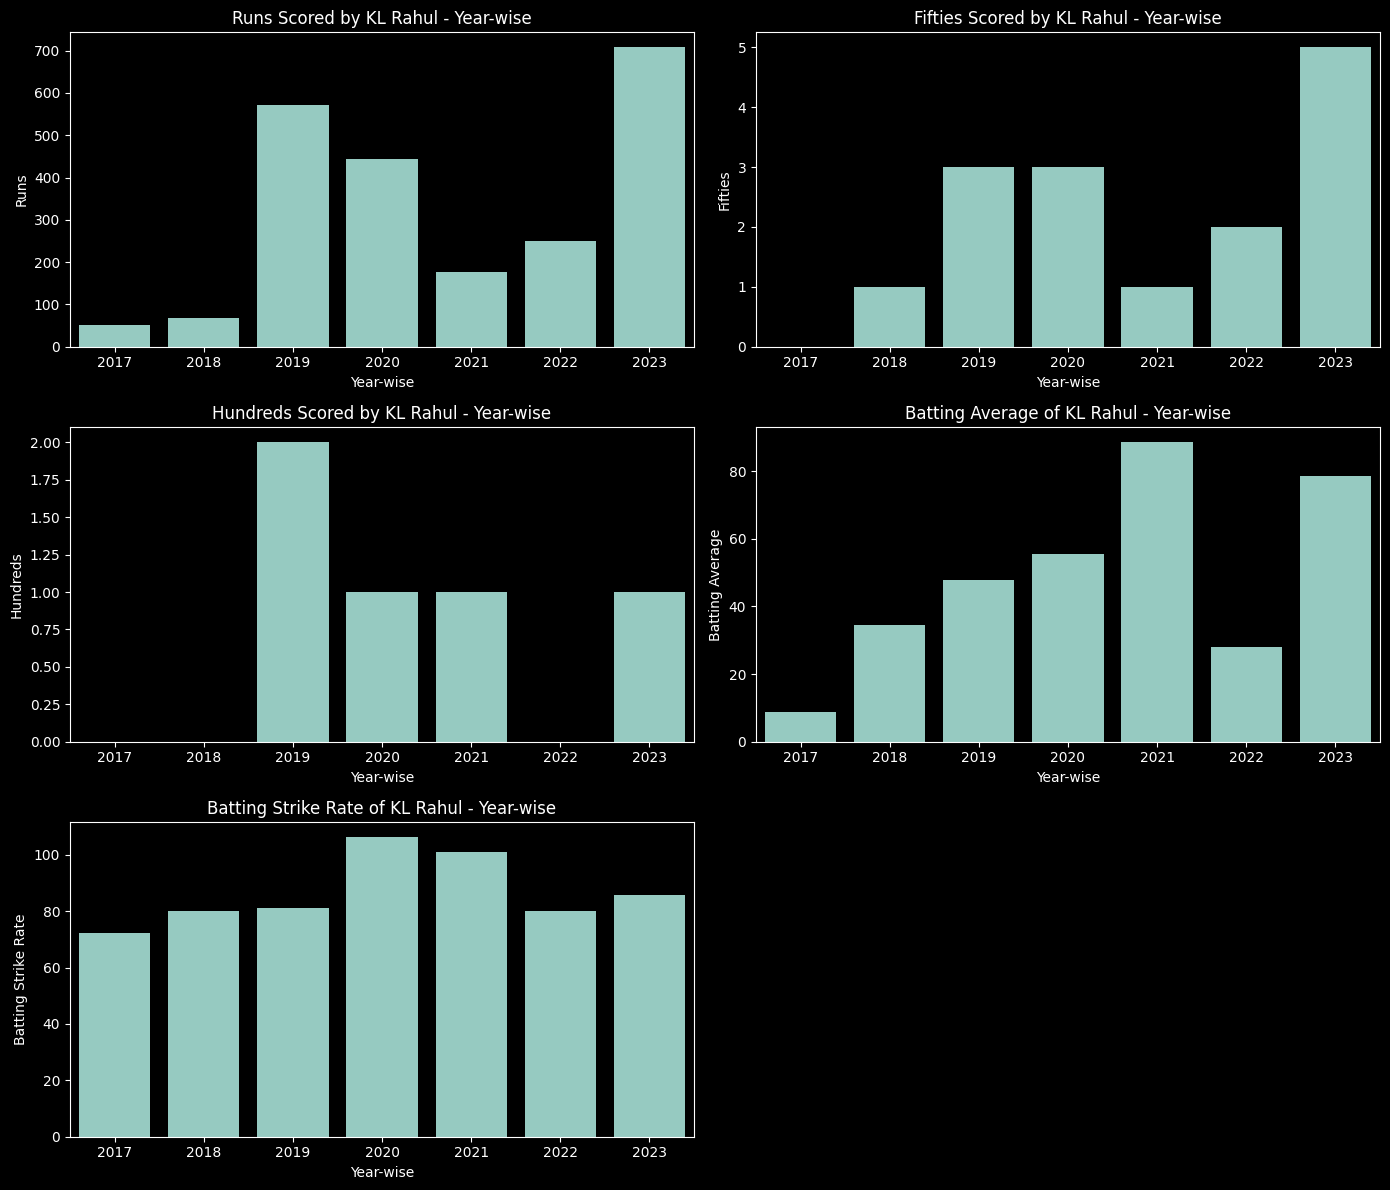

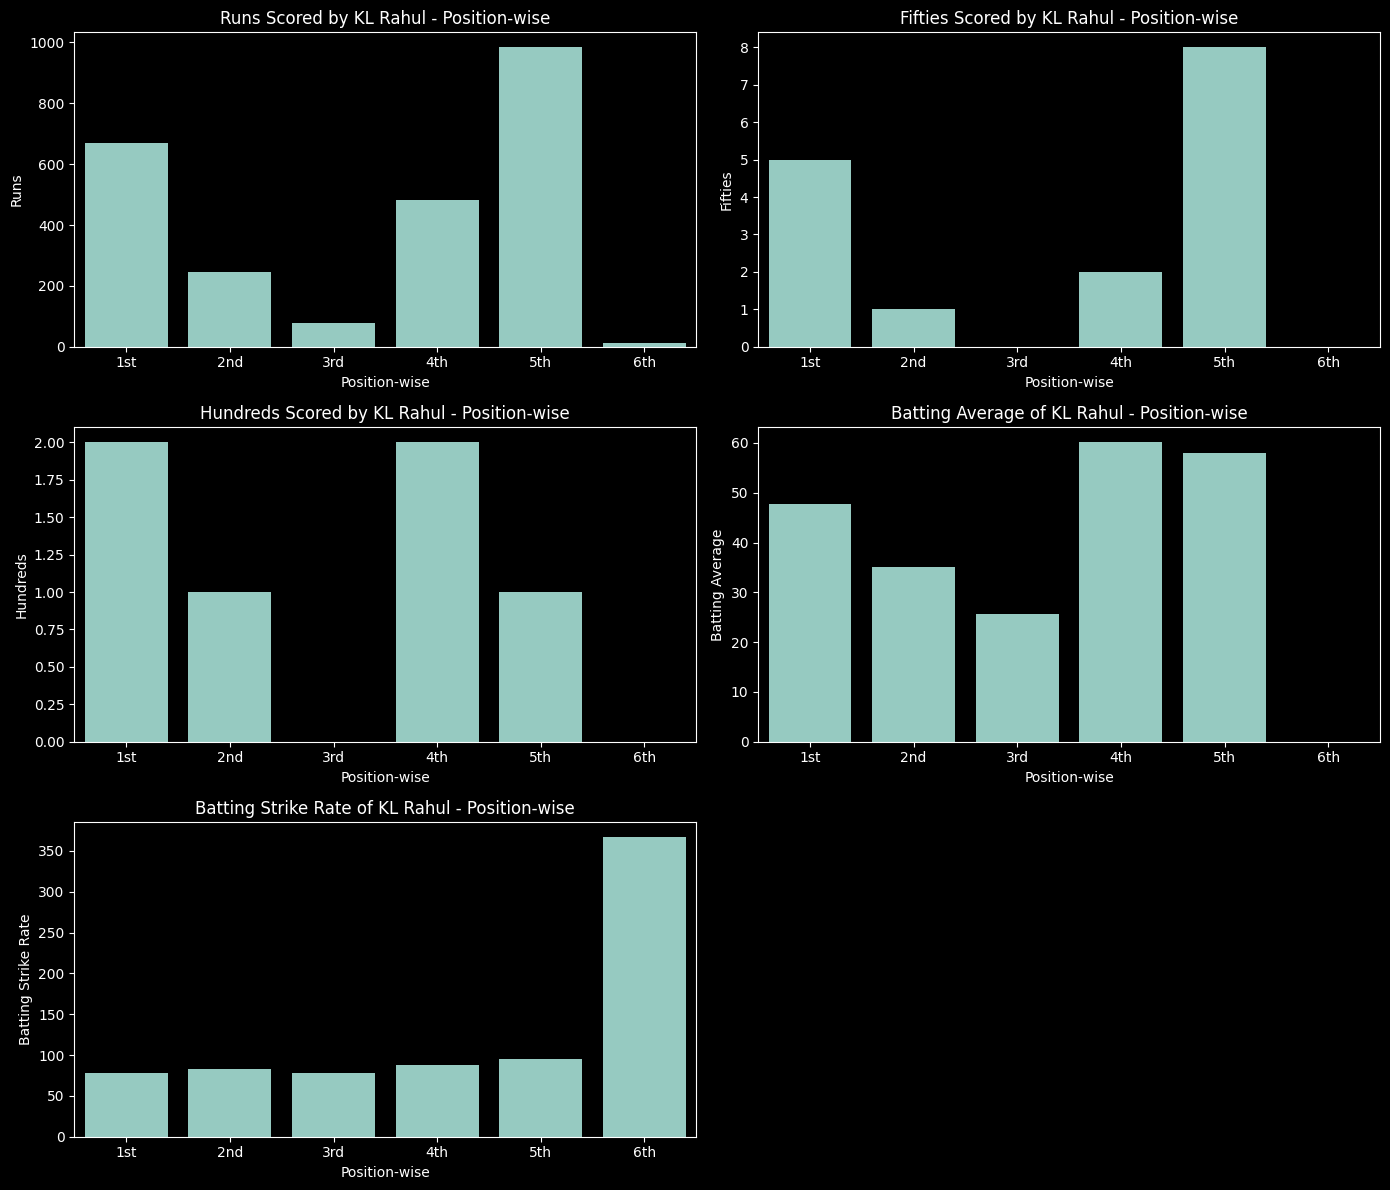

Suryakumar Yadav Batting Stats


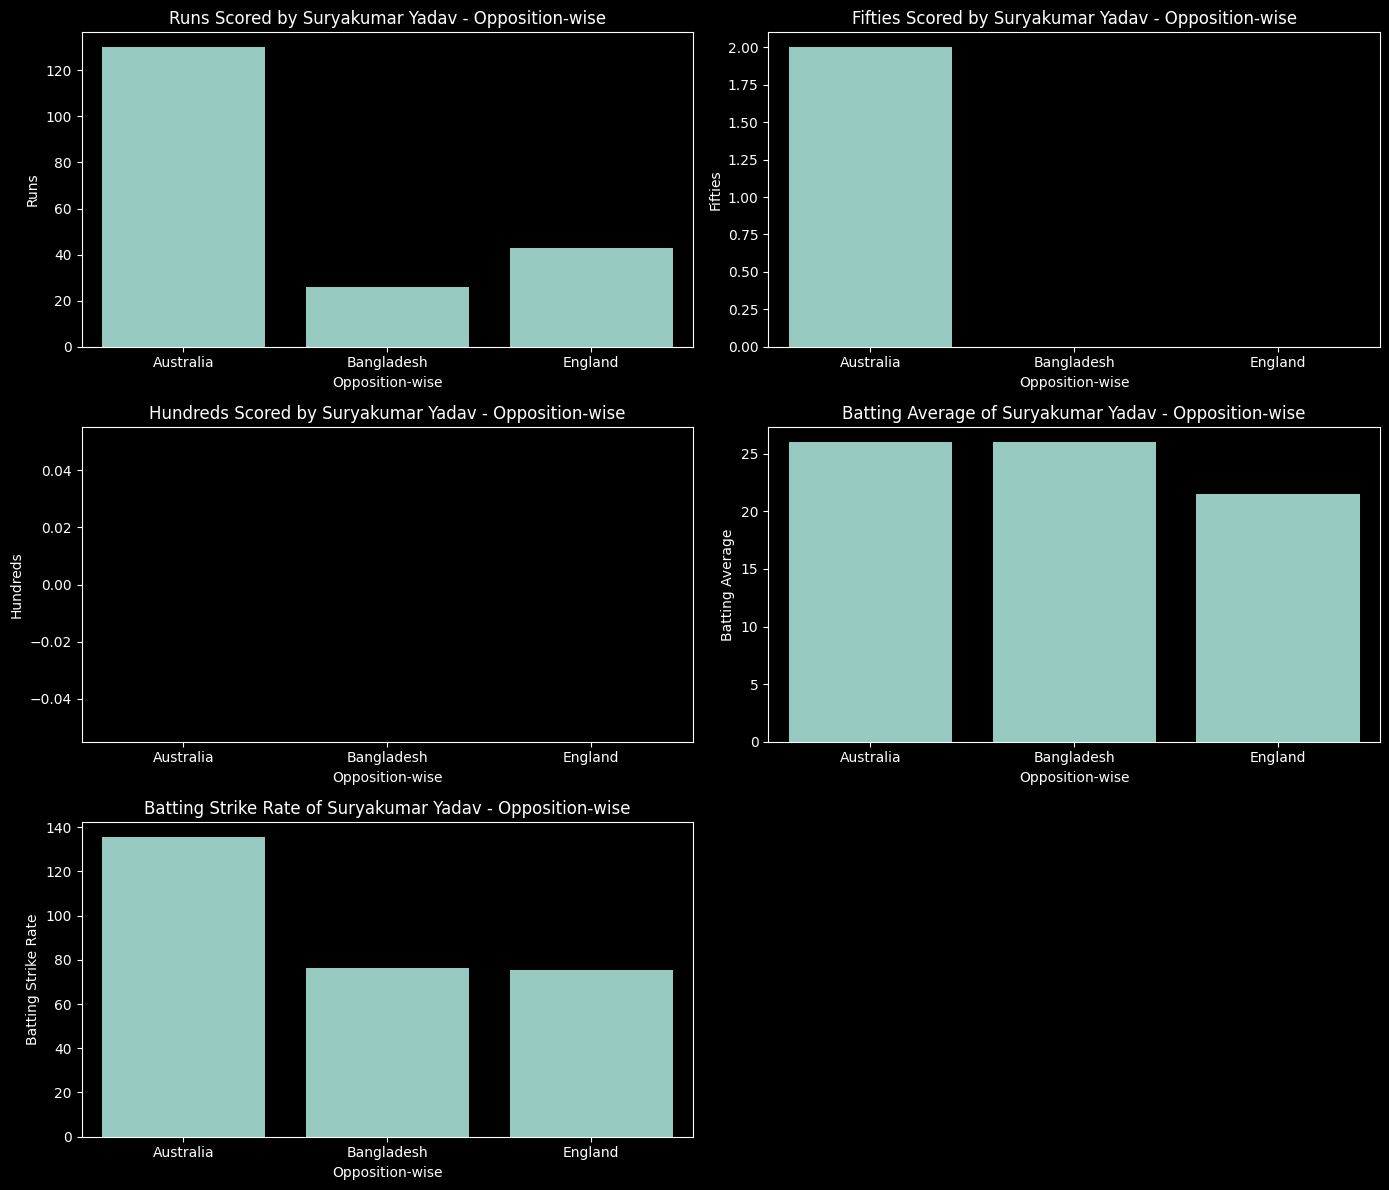

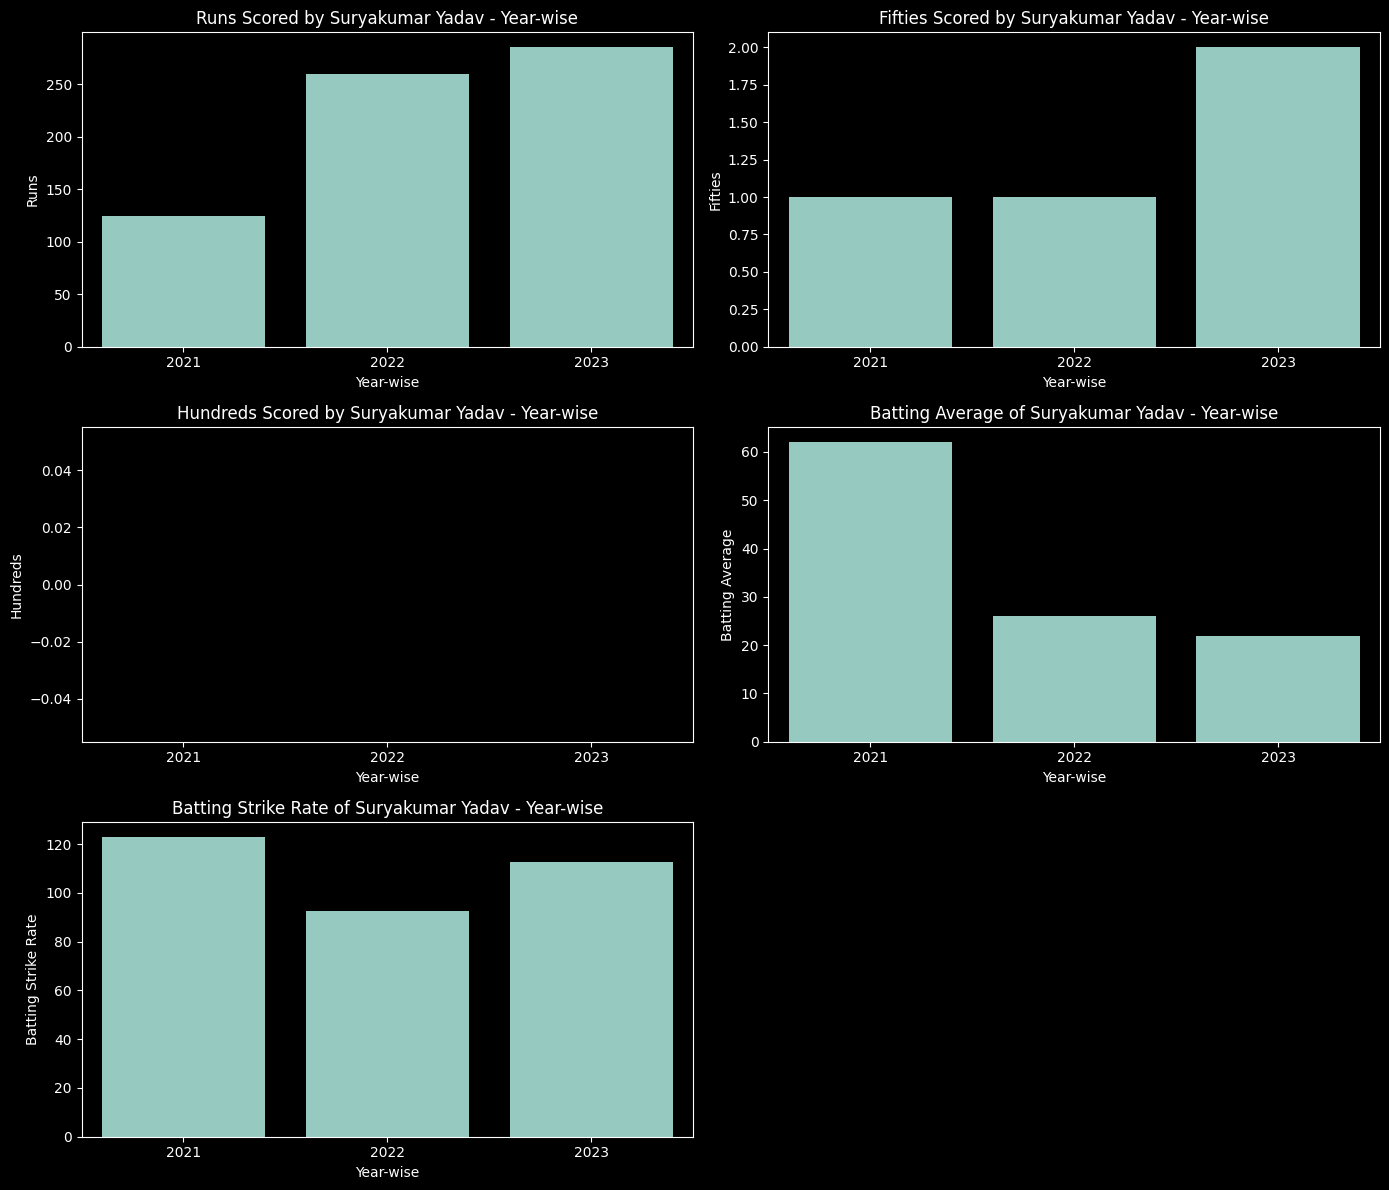

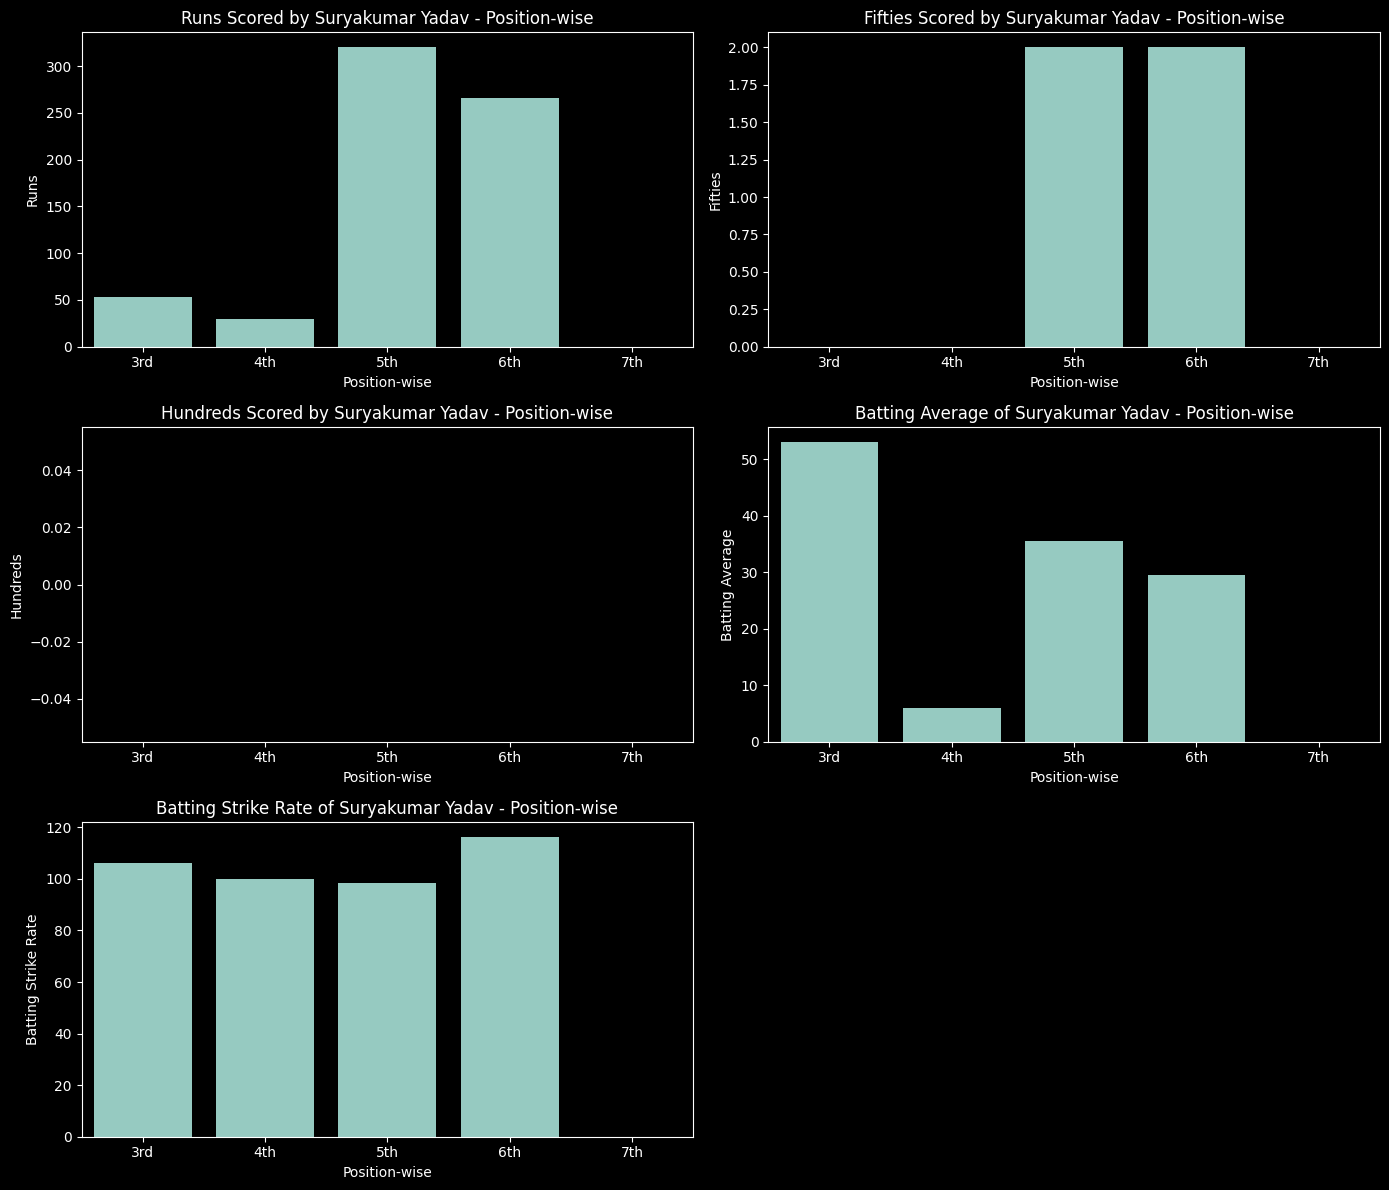

Ravindra Jadeja Batting Stats


In [8]:
# Iterate through players and statistics types
for player, roles in players_and_roles.items():
    if "batter" not in roles:
        continue
    
    player_name = player.lower().replace(" ", "_")

    # Read player data from JSON file
    player_data = read_player_data(player_name)

    # Extract relevant batting statistics
    opposition_stats_batting, yearwise_stats_batting, position_stats_batting = extract_batting_statistics(player_data)

    # Create DataFrames for plotting
    opposition_stats_batting_df = pd.DataFrame(opposition_stats_batting)
    yearwise_stats_batting_df = pd.DataFrame(yearwise_stats_batting)
    position_stats_batting_df = pd.DataFrame(position_stats_batting)

    print(f"{player} Batting Stats")
    # Iterate through statistics types and generate plots
    for stats_batting_type, stats_batting_df in [("Opposition-wise", opposition_stats_batting_df),
                                 ("Year-wise", yearwise_stats_batting_df),
                                 ("Position-wise", position_stats_batting_df)]:
        if len(stats_batting_df):
            create_batting_eda_plots(player, stats_batting_type, stats_batting_df)


In [ ]:
# Iterate through players and statistics types
for player, roles in players_and_roles.items():
    if "bowler" not in roles:
        continue

    player_name = player.lower().replace(" ", "_")

    # Read player data from JSON file
    player_data = read_player_data(player_name)

    # Extract relevant batting statistics
    opposition_stats_bowling, yearwise_stats_bowling, position_stats_bowling = extract_bowling_statistics(player_data)

    # Create DataFrames for easy plotting
    opposition_stats_bowling_df = pd.DataFrame(opposition_stats_bowling)
    yearwise_stats_bowling_df = pd.DataFrame(yearwise_stats_bowling)
    position_stats_bowling_df = pd.DataFrame(position_stats_bowling)
    

    print(f"{player} Bowling Stats")
    # Iterate through statistics types and generate plots
    for stats_bowling_type, stats_bowling_df in [("Opposition-wise", opposition_stats_bowling_df),
                                 ("Year-wise", yearwise_stats_bowling_df),
                                 ("Position-wise", position_stats_bowling_df)]:
        if len(stats_bowling_df):
            create_bowling_eda_plots(player, stats_bowling_type, stats_bowling_df)


Hardik Pandya Bowling Stats
            id  matches  overs  wickets  maiden  bowling_strike_rate  \
0  Afghanistan        2   17.0        4       1                 25.5   
1    Australia       13   62.0       12       0                 31.0   
2   Bangladesh        3   14.3        3       0                 29.0   
3      England       13   83.3       12       4                 41.7   
4     Pakistan        7   41.5        8       0                 31.3   

   bowling_economy  
0             5.52  
1             6.43  
2             7.03  
3             5.90  
4             5.13  
     id  matches  overs  wickets  maiden  bowling_strike_rate  bowling_economy
0  2017       28  197.2       31       3                 38.1             5.57
1  2018       10   71.2        5       0                 85.6             5.55
2  2019       12  100.0       14       2                 42.8             5.57
3  2020        3    4.0        1       0                 24.0             6.00
4  2021        6  